# 1. Desaf√≠o TelecomX LATAM
_Junio 10, 2025_

## 1.1 Introducci√≥n al Desaf√≠o

En este notebook, abordaremos el desaf√≠o de TelecomX LATAM, cuyo objetivo principal es analizar los datos de clientes para comprender los factores que influyen en la evasi√≥n (Churn). A trav√©s de la extracci√≥n, transformaci√≥n y an√°lisis de estos datos, buscaremos insights que permitan a TelecomX desarrollar estrategias para retener a sus clientes.

---

## 1.2 Extracci√≥n de Datos (E - Extract)

En esta secci√≥n, realizaremos la extracci√≥n de los datos de clientes de TelecomX desde una URL remota. El conjunto de datos se encuentra en formato JSON. Se implementar√° un manejo de errores para asegurar una carga robusta.

In [1]:
# EXTRACCI√ìN DE DATOS (CARGA REMOTA DESDE URL)

import requests
import json
import pandas as pd

# --- 1. Definici√≥n de la URL y variables ---
url_dataset = "https://storage.googleapis.com/desafio-telecomx-churn-analysis/Dataset/TelecomX_Data.json"
resultado_json_crudo = None
df = pd.DataFrame()
df_original_normalized = pd.DataFrame()

print(f"Intentando cargar datos desde: {url_dataset}")

# --- 2. Petici√≥n HTTP para obtener los datos ---
try:
    # Hacemos la petici√≥n GET a la URL
    response = requests.get(url_dataset)
    
    # Verificamos si la petici√≥n fue exitosa (c√≥digo 200 OK)
    response.raise_for_status()  
    
    # Decodificamos la respuesta JSON
    resultado_json_crudo = response.json()

    # --- 3. Validaci√≥n del JSON cargado ---
    if isinstance(resultado_json_crudo, list) and len(resultado_json_crudo) > 0:
        print(f"‚úÖ JSON cargado correctamente. Registros: {len(resultado_json_crudo)}")
    elif isinstance(resultado_json_crudo, list):
        print(f"‚ö†Ô∏è JSON cargado pero est√° vac√≠o.")
        resultado_json_crudo = None
    else:
        print(f"‚ùå El contenido no es una lista v√°lida. Tipo: {type(resultado_json_crudo)}")
        resultado_json_crudo = None

# --- 4. Manejo de errores espec√≠ficos ---
except requests.exceptions.HTTPError as e_http:
    print(f"‚ùå Error HTTP al intentar acceder a la URL: {e_http}")
except requests.exceptions.RequestException as e_req:
    print(f"‚ùå Error de red o conexi√≥n: {e_req}")
except json.JSONDecodeError as e_json:
    print(f"‚ùå Error al decodificar el JSON. El contenido recibido no es v√°lido: {e_json}")
except Exception as e:
    print(f"‚ùå Error inesperado: {e}")


Intentando cargar datos desde: https://storage.googleapis.com/desafio-telecomx-churn-analysis/Dataset/TelecomX_Data.json
‚úÖ JSON cargado correctamente. Registros: 7267


---
### 1.2.1 Normalizaci√≥n y Creaci√≥n del DataFrame

Una vez cargados los datos JSON, los normalizaremos para convertirlos en una estructura tabular utilizando un DataFrame de Pandas. Esto facilitar√° su manipulaci√≥n y an√°lisis.

In [2]:
# NORMALIZACI√ìN Y CREACI√ìN DEL DATAFRAME (USANDO resultado_json_crudo)
from IPython.display import display

if 'resultado_json_crudo' in locals() and \
   resultado_json_crudo and \
   isinstance(resultado_json_crudo, list):
    
    print(f"\n--- Normalizando {len(resultado_json_crudo)} registros JSON a DataFrame ---")
    try:
        df = pd.json_normalize(resultado_json_crudo)
        df_original_normalized = df.copy()
        print(f"‚úÖ DataFrame normalizado. Dimensiones: {df.shape}")
    except Exception as e:
        print(f"‚ùå Error al normalizar JSON: {e}")
else:
    print("‚ÑπÔ∏è No se realiz√≥ la normalizaci√≥n. Verifica los datos cargados en la celda anterior.")

print("\n--- Primeras filas del DataFrame ---")
display(df.head())



--- Normalizando 7267 registros JSON a DataFrame ---
‚úÖ DataFrame normalizado. Dimensiones: (7267, 21)

--- Primeras filas del DataFrame ---


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

---

## 2. Transformaci√≥n de Datos (T - Transform)

Esta secci√≥n se enfoca en la limpieza y transformaci√≥n de los datos para asegurar su calidad, consistencia y adecuaci√≥n para el an√°lisis posterior.

### 2.1. Inspecci√≥n Inicial y Tipos de Datos

Comenzamos con una inspecci√≥n general del DataFrame. El objetivo es entender su estructura fundamental, identificar los tipos de datos asignados a cada columna por Pandas y detectar la presencia inicial de valores nulos o formatos inesperados.

In [3]:
# Informaci√≥n general del DataFrame
df.info()

# Estad√≠sticas descriptivas para variables num√©ricas
display(df.describe())

# Dimensiones del DataFrame
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

customer.SeniorCitizen  customer.tenure  account.Charges.Monthly
count             7267.000000      7267.000000              7267.000000
mean                 0.162653        32.346498                64.720098
std                  0.369074        24.571773                30.129572
min                  0.000000         0.000000                18.250000
25%                  0.000000         9.000000                35.425000
50%                  0.000000        29.000000                70.300000
75%                  0.000000        55.000000                89.875000
max                  1.000000        72.000000               118.750000

(7267, 21)

---
### 2.2. Manejo de Valores Nulos y Duplicados

Identificaremos y trataremos los valores nulos y duplicados en el conjunto de datos.

#### 2.2.1. Tratamiento de la Columna `account.Charges.Total`
La columna `account.Charges.Total` requiere una atenci√≥n especial, ya que contiene strings vac√≠os que deben ser tratados como valores nulos y luego convertidos a un tipo num√©rico. Los valores nulos resultantes se imputar√°n con 0, asumiendo que podr√≠an corresponder a clientes nuevos sin cargos totales acumulados o errores de registro.

In [4]:
# Conteo absoluto de valores nulos (>0)
df.isnull().sum()[lambda x: x > 0]

# Porcentaje de valores nulos (>0)
(df.isnull().sum() / len(df) * 100)[lambda x: x > 0]

# Conteo de filas duplicadas
df.duplicated().sum()

# Eliminaci√≥n de filas duplicadas
df = df.drop_duplicates()

In [5]:
# Reemplazar strings vac√≠os con None y convertir columna a num√©rico
df["account.Charges.Total"] = pd.to_numeric(
    df["account.Charges.Total"].replace("", None), errors="coerce"
)

---
#### 2.2.2. Verificaci√≥n General de Nulos y Duplicados
Realizamos un conteo de valores nulos por columna y verificamos la existencia de filas duplicadas.

In [6]:
# Conteo de valores nulos por columna
df.isna().sum()

# Conteo de strings vac√≠os por columna
(df == '').sum()

# Verificaci√≥n de duplicados nuevamente
df.duplicated().sum()

# Eliminaci√≥n de duplicados (si quedara alguno)
df = df.drop_duplicates()

# Tipos de datos por columna
df.dtypes

# Valores √∫nicos en la columna 'Churn'
df["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

---
#### 2.2.3. Tratamiento de la Columna `Churn`
Se eliminan las filas donde la variable objetivo `Churn` no tiene etiqueta (string vac√≠o).

In [7]:
# Eliminar filas sin etiqueta de churn
df = df[df["Churn"] != ''].copy()

# Rellenar cargos totales faltantes con 0
df["account.Charges.Total"] = df["account.Charges.Total"].fillna(0)

---
### 2.3. Estandarizaci√≥n de Datos Textuales y Nombres de Columnas
Para asegurar la consistencia, se realizar√°n las siguientes transformaciones:
*   Convertir el contenido de todas las columnas de tipo objeto a min√∫sculas y eliminar espacios en blanco al inicio/final.
*   Limpiar los nombres de las columnas eliminando prefijos (`customer.`, `phone.`, `internet.`, `account.`) y convirti√©ndolos a min√∫sculas.
*   Estandarizar valores espec√≠ficos como "no internet service" y "no phone service" a un simple "no" en las columnas de servicios relevantes (despu√©s de que los nombres de columna est√©n limpios).
*   Verificar los valores √∫nicos de columnas clave para asegurar la correcta aplicaci√≥n de las transformaciones.
*   Limpiar valores en columnas categ√≥ricas clave (`paymentmethod`, `contract`, `internetservice`) reemplazando espacios por guiones bajos y eliminando par√©ntesis.

In [8]:
# Eliminar espacios y convertir a min√∫sculas en todas las columnas de tipo objeto
if not df.empty:
    print("--- Limpiando contenido de columnas 'object' (min√∫sculas y strip) ---")
    for col in df.select_dtypes(include='object').columns:
        if col in df.columns: # Asegurar que la columna a√∫n existe y es object
            df[col] = df[col].str.strip().str.lower()
    print("Contenido de columnas 'object' convertido a min√∫sculas y sin espacios extra.")
else:
    print("DataFrame vac√≠o, no se pueden limpiar datos textuales.")

--- Limpiando contenido de columnas 'object' (min√∫sculas y strip) ---
Contenido de columnas 'object' convertido a min√∫sculas y sin espacios extra.


In [9]:
columns_to_clean = [
    "internet.OnlineSecurity", "internet.OnlineBackup", "internet.DeviceProtection",
    "internet.TechSupport", "internet.StreamingTV", "internet.StreamingMovies", 
    "phone.MultipleLines"
]

# Solo limpiar columnas que existen
existing_columns = [col for col in columns_to_clean if col in df.columns]

df[existing_columns] = df[existing_columns].replace({
    "no internet service": "no",
    "no phone service": "no"
})

In [10]:
# Quitar prefijos, convertir a min√∫sculas y reemplazar puntos por guiones bajos
if not df.empty:
    print("\n--- Limpiando y Estandarizando Nombres de Columnas ---")
    # 1. Quitar prefijos
    df.columns = df.columns.str.replace(r'^(customer\.|phone\.|internet\.|account\.)', '', regex=True)
    # 2. Convertir a min√∫sculas
    df.columns = df.columns.str.lower()
    # 3. Reemplazar puntos por guiones bajos
    df.columns = [col.replace('.', '_') for col in df.columns]
    # Alternativa para el paso 3, un poco m√°s "pandorable" pero necesita regex=False:
    # df.columns = df.columns.str.replace('.', '_', regex=False)

    print("Columnas con Nombres Limpios y Estandarizados:")
    print(df.columns.tolist())
else:
    print("DataFrame vac√≠o, no se pueden limpiar nombres de columnas.")


--- Limpiando y Estandarizando Nombres de Columnas ---
Columnas con Nombres Limpios y Estandarizados:
['customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total']


In [11]:
# Estandarizaci√≥n de "no internet service" / "no phone service"
# Esta celda ahora usa los nombres de columna ya limpios.
if not df.empty:
    print("\n--- Estandarizando valores de servicios ('no internet service' / 'no phone service' a 'no') ---")
    columns_to_standardize_services = [
        "onlinesecurity", "onlinebackup", "deviceprotection",
        "techsupport", "streamingtv", "streamingmovies", "multiplelines"
    ]
    existing_columns_to_standardize = [col for col in columns_to_standardize_services if col in df.columns]

    if existing_columns_to_standardize:
        df[existing_columns_to_standardize] = df[existing_columns_to_standardize].replace({
            "no internet service": "no", # Estos strings ya est√°n en min√∫sculas por la celda anterior
            "no phone service": "no"
        })
        print("Valores 'no internet service'/'no phone service' estandarizados a 'no'.")
        # Opcional: Verificar algunos valores √∫nicos despu√©s de esta estandarizaci√≥n espec√≠fica
        # for col_check in existing_columns_to_standardize:
        #     if df[col_check].isin(["no internet service", "no phone service"]).any():
        #        print(f"Advertencia: A√∫n hay valores sin estandarizar en {col_check}")
        #     else:
        #        print(f"Valores √∫nicos en '{col_check}' despu√©s de estandarizar servicios: {df[col_check].unique()}")
    else:
        print("No se encontraron columnas de servicios para estandarizar o ya no existen con los nombres esperados.")
else:
    print("DataFrame vac√≠o, no se puede estandarizar servicios.")



--- Estandarizando valores de servicios ('no internet service' / 'no phone service' a 'no') ---
Valores 'no internet service'/'no phone service' estandarizados a 'no'.


In [12]:
# Verificar si todas las columnas con posibles problemas de case existen y convertir valores a min√∫sculas
# (Esta celda se enfoca m√°s en asegurar que los datos est√©n en min√∫sculas despu√©s de todas las manipulaciones)
if not df.empty:
    print("\n--- Verificaci√≥n Final de Valores √önicos y Consistencia de Case (Post-Estandarizaci√≥n) ---")
    columns_to_check_case_and_uniques = [
        "churn", "gender", "partner", "dependents", "phoneservice",
        "multiplelines", "internetservice", "onlinesecurity", "onlinebackup",
        "deviceprotection", "techsupport", "streamingtv", "streamingmovies",
        "contract", "paperlessbilling", "paymentmethod"
    ]
    
    missing_cols_check = [col for col in columns_to_check_case_and_uniques if col not in df.columns]
    if missing_cols_check:
        print(f"Columnas faltantes para la verificaci√≥n de case y √∫nicos: {missing_cols_check}")

    existing_cols_to_check = [col for col in columns_to_check_case_and_uniques if col in df.columns]
    
    if existing_cols_to_check:
        # Asegurar min√∫sculas en estas columnas si son de tipo objeto/string
        for col in existing_cols_to_check:
            if df[col].dtype == 'object' or df[col].dtype == 'string': # 'string' es el tipo de Pandas, 'object' es m√°s general
                df[col] = df[col].str.lower()
        
        # Mostrar valores √∫nicos para verificaci√≥n
        for col in existing_cols_to_check:
            print(f"Valores √∫nicos en '{col}': {df[col].unique()}")
    else:
        print("No hay columnas especificadas para la verificaci√≥n de case y √∫nicos.")
else:
    print("DataFrame vac√≠o.")


--- Verificaci√≥n Final de Valores √önicos y Consistencia de Case (Post-Estandarizaci√≥n) ---
Valores √∫nicos en 'churn': ['no' 'yes']
Valores √∫nicos en 'gender': ['female' 'male']
Valores √∫nicos en 'partner': ['yes' 'no']
Valores √∫nicos en 'dependents': ['yes' 'no']
Valores √∫nicos en 'phoneservice': ['yes' 'no']
Valores √∫nicos en 'multiplelines': ['no' 'yes']
Valores √∫nicos en 'internetservice': ['dsl' 'fiber optic' 'no']
Valores √∫nicos en 'onlinesecurity': ['no' 'yes']
Valores √∫nicos en 'onlinebackup': ['yes' 'no']
Valores √∫nicos en 'deviceprotection': ['no' 'yes']
Valores √∫nicos en 'techsupport': ['yes' 'no']
Valores √∫nicos en 'streamingtv': ['yes' 'no']
Valores √∫nicos en 'streamingmovies': ['no' 'yes']
Valores √∫nicos en 'contract': ['one year' 'month-to-month' 'two year']
Valores √∫nicos en 'paperlessbilling': ['yes' 'no']
Valores √∫nicos en 'paymentmethod': ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [13]:
# Reemplazar espacios y par√©ntesis en valores categ√≥ricos clave (etiquetas legibles para ML)
if not df.empty:
    columns_to_sanitize_values = ["paymentmethod", "contract", "internetservice"]
    print("\n--- Sanitizando Valores en Columnas Categ√≥ricas Clave (espacios a '_', remover '()') ---")
    for col in columns_to_sanitize_values:
        if col in df.columns:
            print(f"Valores √∫nicos en '{col}' (antes de sanitizar): {df[col].unique()}")
            df[col] = df[col].str.replace(' ', '_', regex=False)\
                             .str.replace('(', '', regex=False)\
                             .str.replace(')', '', regex=False)
            print(f"Valores √∫nicos en '{col}' (despu√©s de sanitizar): {df[col].unique()}")
        else:
            print(f"Columna '{col}' no encontrada para sanitizar.")
else:
    print("DataFrame vac√≠o, no se puede sanitizar.")



--- Sanitizando Valores en Columnas Categ√≥ricas Clave (espacios a '_', remover '()') ---
Valores √∫nicos en 'paymentmethod' (antes de sanitizar): ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Valores √∫nicos en 'paymentmethod' (despu√©s de sanitizar): ['mailed_check' 'electronic_check' 'credit_card_automatic'
 'bank_transfer_automatic']
Valores √∫nicos en 'contract' (antes de sanitizar): ['one year' 'month-to-month' 'two year']
Valores √∫nicos en 'contract' (despu√©s de sanitizar): ['one_year' 'month-to-month' 'two_year']
Valores √∫nicos en 'internetservice' (antes de sanitizar): ['dsl' 'fiber optic' 'no']
Valores √∫nicos en 'internetservice' (despu√©s de sanitizar): ['dsl' 'fiber_optic' 'no']


---
### 2.4. Conversi√≥n de Tipos de Datos
Se convierten las columnas a los tipos de datos adecuados para el an√°lisis:
*   Columnas binarias ('yes'/'no') a `int` (yes:1, no:0).
*   Columna `gender` a `int` (female:0, male:1).
*   Columnas categ√≥ricas relevantes a tipo `category` para eficiencia.
*   `customerid` a tipo `string`.

In [14]:
# CONVERSI√ìN DE TIPOS DE DATOS

if not df.empty:
    print("\n--- Iniciando Conversi√≥n de Tipos de Datos ---")

    # 1. Definir y convertir columnas binarias expl√≠citamente
    binary_cols = [
        'churn', 'partner', 'dependents', 'phoneservice',
        'multiplelines', # <--- 'multiplelines' es tratada como binaria aqu√≠
        'onlinesecurity', 'onlinebackup', 'deviceprotection',
        'techsupport', 'streamingtv', 'streamingmovies',
        'paperlessbilling'
    ]
    existing_binary_cols = [col for col in binary_cols if col in df.columns]

    if existing_binary_cols:
        for col in existing_binary_cols:
            # Asegurar que los valores son 'yes' o 'no' (o ya 0/1 si alguna limpieza previa lo hizo)
            # y luego reemplazar.
            if df[col].dtype == 'object': # Solo reemplazar si es string/object
                 df[col] = df[col].replace({'yes': 1, 'no': 0})

            # Convertir a num√©rico, errores a NaN, luego rellenar NaNs con 0 (o un valor por defecto)
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if df[col].isnull().sum() > 0:
                print(f"Advertencia: La columna binaria '{col}' conten√≠a valores no convertibles a 0/1. Los NaNs se imputar√°n con 0.")
                df[col] = df[col].fillna(0) # O manejar de otra forma si se prefiere

        df[existing_binary_cols] = df[existing_binary_cols].astype(int)
        print(f"Columnas binarias convertidas a int: {existing_binary_cols}")

    # 2. Conversi√≥n de g√©nero
    if 'gender' in df.columns:
        if df['gender'].dtype == 'object': # Solo reemplazar si es string/object
            df['gender'] = df['gender'].replace({'female': 0, 'male': 1})
        df['gender'] = pd.to_numeric(df['gender'], errors='coerce').fillna(0) # Default a 0 (female) si hay error
        df['gender'] = df['gender'].astype(int)
        print("Columna 'gender' convertida a int.")

    # 3. Convertir columnas genuinamente categ√≥ricas (no binarias)
    # 'multiplelines' ya fue tratada como binaria y convertida a int.
    # Si una columna est√° aqu√≠, NO deber√≠a estar en binary_cols.
    category_cols_def = ['internetservice', 'contract', 'paymentmethod']
    existing_category_cols_def = [col for col in category_cols_def if col in df.columns]

    if existing_category_cols_def:
        converted_to_category = []
        for col in existing_category_cols_def:
            # Solo convertir a category si no es ya num√©rica (ej. por si alguna columna binaria se col√≥ aqu√≠)
            if not pd.api.types.is_numeric_dtype(df[col]):
                df[col] = df[col].astype('category')
                converted_to_category.append(col)
        if converted_to_category:
            print(f"Columnas convertidas a category: {converted_to_category}")
        else:
            print("No se convirtieron nuevas columnas a 'category' (podr√≠an ser ya num√©ricas o no existir).")

    # 4. Asegurar que customerid sea string
    if 'customerid' in df.columns:
        df['customerid'] = df['customerid'].astype('string')
        print("Columna 'customerid' convertida a string.")

    print("\n--- Informaci√≥n del DataFrame (Despu√©s de Conversi√≥n de Tipos) ---")
    df.info()
else:
    print("DataFrame vac√≠o, no se pueden convertir tipos.")


--- Iniciando Conversi√≥n de Tipos de Datos ---
Columnas binarias convertidas a int: ['churn', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']
Columna 'gender' convertida a int.
Columnas convertidas a category: ['internetservice', 'contract', 'paymentmethod']
Columna 'customerid' convertida a string.

--- Informaci√≥n del DataFrame (Despu√©s de Conversi√≥n de Tipos) ---
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   string  
 1   churn             7043 non-null   int64   
 2   gender            7043 non-null   int64   
 3   seniorcitizen     7043 non-null   int64   
 4   partner           7043 non-null   int64   
 5   dependents        7043 non-null   int64   
 6   te

/var/tmp/ipykernel_5908/484778967.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})
/var/tmp/ipykernel_5908/484778967.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'female': 0, 'male': 1})


---
### 2.5. Creaci√≥n de Nuevas Caracter√≠sticas (Feature Engineering)

#### 2.5.1. Columna `daily_charges`
Se crea la columna `daily_charges` (cargos diarios) dividiendo `charges.monthly` por un promedio de d√≠as en el mes (30 d√≠as).

In [15]:
# CREACI√ìN DE LA COLUMNA 'daily_charges'

if not df.empty and 'charges_monthly' in df.columns:
    print("\n--- Creando la columna 'daily_charges' ---")
    
    # Para el c√°lculo de "d√≠as en un mes", se puede usar un promedio.
    # Un enfoque com√∫n es usar 30.4375 d√≠as por mes (365.25 d√≠as/a√±o / 12 meses/a√±o).
    dias_en_mes_promedio = 30.4375

    # Asegurarse de que 'charges_monthly' sea num√©rico antes de la divisi√≥n
    if pd.api.types.is_numeric_dtype(df['charges_monthly']):
        df['daily_charges'] = df['charges_monthly'] / dias_en_mes_promedio

        # Redondear a 2 decimales
        df['daily_charges'] = df['daily_charges'].round(2)
        
        print("Columna 'daily_charges' creada exitosamente.")
        display(df[['charges_monthly', 'daily_charges']].head())
        
        print(f"\nTipo de dato de 'daily_charges': {df['daily_charges'].dtype}")
        print("\nEstad√≠sticas descriptivas de 'daily_charges':")
        display(df['daily_charges'].describe())
    else:
        print(f"‚ùå Error: La columna 'charges.monthly' no es de tipo num√©rico. No se puede calcular 'daily_charges'. "
              f"Tipo actual: {df['charges_monthly'].dtype}")
        
    # Opcional: Verificar info del DataFrame completo despu√©s de a√±adir la nueva columna
    # print("\n--- Informaci√≥n del DataFrame con 'daily_charges' ---")
    # df.info()
else:
    print("DataFrame vac√≠o o la columna 'charges.monthly' no existe.")


--- Creando la columna 'daily_charges' ---
Columna 'daily_charges' creada exitosamente.


charges_monthly  daily_charges
0             65.6           2.16
1             59.9           1.97
2             73.9           2.43
3             98.0           3.22
4             83.9           2.76


Tipo de dato de 'daily_charges': float64

Estad√≠sticas descriptivas de 'daily_charges':


count    7043.000000
mean        2.127696
std         0.988494
min         0.600000
25%         1.170000
50%         2.310000
75%         2.950000
max         3.900000
Name: daily_charges, dtype: float64

In [16]:
df.head()

customerid  churn  gender  seniorcitizen  partner  dependents  tenure  \
0  0002-orfbo      0       0              0        1           1       9   
1  0003-mknfe      0       1              0        0           0       9   
2  0004-tlhlj      1       1              0        0           0       4   
3  0011-igkff      1       1              1        1           0      13   
4  0013-exchz      1       0              1        1           0       3   

   phoneservice  multiplelines internetservice  ...  deviceprotection  \
0             1              0             dsl  ...                 0   
1             1              1             dsl  ...                 0   
2             1              0     fiber_optic  ...                 1   
3             1              0     fiber_optic  ...                 1   
4             1              0     fiber_optic  ...                 0   

   techsupport  streamingtv  streamingmovies        contract  \
0            1            1                0        one_year   
1            0            0                1  month-to-month   
2            0            0                0  month-to-month   
3            0            1                1  month-to-month   
4            1            1                0  month-to-month   

   paperlessbilling     paymentmethod  charges_monthly charges_total  \
0                 1      mailed_check             65.6        593.30   
1                 0      mailed_check             59.9        542.40   
2                 1  electronic_check             73.9        280.85   
3                 1  electronic_check             98.0       1237.85   
4                 1      mailed_check             83.9        267.40   

   daily_charges  
0           2.16  
1           1.97  
2           2.43  
3           3.22  
4           2.76  

[5 rows x 22 columns]

---

## 3. An√°lisis Exploratorio de Datos (EDA)

Una vez que los datos han sido limpiados y transformados, entramos en la fase de An√°lisis Exploratorio de Datos (EDA). El prop√≥sito principal de esta etapa es descubrir patrones, identificar anomal√≠as, probar hip√≥tesis y verificar supuestos a trav√©s de res√∫menes estad√≠sticos y representaciones gr√°ficas. El objetivo final es obtener una comprensi√≥n profunda de los datos que nos permita explicar los factores que podr√≠an estar contribuyendo a la evasi√≥n de clientes.

### 3.1. An√°lisis Descriptivo General

Comenzamos el EDA revisando las estad√≠sticas descriptivas del conjunto de datos ya procesado. Esto incluye m√©tricas centrales (media, mediana), medidas de dispersi√≥n (desviaci√≥n est√°ndar, rangos) y conteos para variables categ√≥ricas. Este panorama general nos ayuda a entender las caracter√≠sticas fundamentales de cada variable y del dataset en su conjunto.

In [17]:
# AN√ÅLISIS DESCRIPTIVO GENERAL (C√ÅLCULO DE M√âTRICAS)

if not df.empty:
    print("--- ESTAD√çSTICAS DESCRIPTIVAS DEL DATAFRAME COMPLETO ---")

    print("\n--- Informaci√≥n General (revisi√≥n post-limpieza) ---")
    df.info()

    print("\n--- Estad√≠sticas Descriptivas - Variables Num√©ricas y las convertidas a 0/1 ---")
    try:
        descriptivas_numericas = df.describe(include=[np.number, 'Int64']) 
        display(descriptivas_numericas.transpose())
    except Exception as e:
        print(f"Error al generar describe para num√©ricas/booleanas: {e}")
        try:
            print("Intentando describe() seleccionando dtypes expl√≠citamente...")
            display(df.select_dtypes(include=['float64', 'int64', 'Int64']).describe().transpose())
        except Exception as e_fallback:
            print(f"Describe() con dtypes expl√≠citos tambi√©n fall√≥: {e_fallback}")

    print("\n--- Estad√≠sticas Descriptivas - Variables Categ√≥ricas (object y category) ---")
    try:
        cols_categoricas_reales = df.select_dtypes(include=['object', 'category', 'string']).columns
        if not cols_categoricas_reales.empty:
            cols_para_describir_cat = [col for col in cols_categoricas_reales if col.lower() != 'customerid']
            if cols_para_describir_cat:
                descriptivas_categoricas = df[cols_para_describir_cat].describe().transpose()
                display(descriptivas_categoricas)
            else:
                print("No hay columnas categ√≥ricas (excluyendo customerid) para describir.")
        else:
            print("No hay columnas de tipo 'object', 'category' o 'string' para describir.")
    except Exception as e:
        print(f"Error al generar describe para categ√≥ricas: {e}")
        
    print("\n--- M√©tricas Espec√≠ficas (Ejemplos) ---")
    cols_para_metricas = ['tenure', 'charges_monthly', 'charges_total', 'daily_charges']
    cols_para_metricas_existentes = [col for col in cols_para_metricas if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
    
    if cols_para_metricas_existentes:
        print("\nMedias:")
        display(df[cols_para_metricas_existentes].mean().to_frame(name='Media'))
        print("\nMedianas:")
        display(df[cols_para_metricas_existentes].median().to_frame(name='Mediana'))
        print("\nDesviaci√≥n Est√°ndar:")
        display(df[cols_para_metricas_existentes].std().to_frame(name='Desv. Est√°ndar'))
    else:
        print("No hay columnas num√©ricas suficientes para calcular m√©tricas espec√≠ficas.")

    print("\n--- Conteo de Valores √önicos por Columna (Cardinalidad) ---")
    try:
        display(df.nunique(dropna=False).sort_values(ascending=False).to_frame(name='Valores √önicos'))
    except Exception as e:
        print(f"Error al calcular nunique: {e}")
else:
    print("El DataFrame est√° vac√≠o. No se puede realizar el an√°lisis descriptivo.")

--- ESTAD√çSTICAS DESCRIPTIVAS DEL DATAFRAME COMPLETO ---

--- Informaci√≥n General (revisi√≥n post-limpieza) ---
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   string  
 1   churn             7043 non-null   int64   
 2   gender            7043 non-null   int64   
 3   seniorcitizen     7043 non-null   int64   
 4   partner           7043 non-null   int64   
 5   dependents        7043 non-null   int64   
 6   tenure            7043 non-null   int64   
 7   phoneservice      7043 non-null   int64   
 8   multiplelines     7043 non-null   int64   
 9   internetservice   7043 non-null   category
 10  onlinesecurity    7043 non-null   int64   
 11  onlinebackup      7043 non-null   int64   
 12  deviceprotection  7043 non-null   int64   
 13  techsupport       7043 non-null   int64   
 14  streamingtv

count         mean          std    min     25%      50%  \
churn             7043.0     0.265370     0.441561   0.00    0.00     0.00   
gender            7043.0     0.504756     0.500013   0.00    0.00     1.00   
seniorcitizen     7043.0     0.162147     0.368612   0.00    0.00     0.00   
partner           7043.0     0.483033     0.499748   0.00    0.00     0.00   
dependents        7043.0     0.299588     0.458110   0.00    0.00     0.00   
tenure            7043.0    32.371149    24.559481   0.00    9.00    29.00   
phoneservice      7043.0     0.903166     0.295752   0.00    1.00     1.00   
multiplelines     7043.0     0.421837     0.493888   0.00    0.00     0.00   
onlinesecurity    7043.0     0.286668     0.452237   0.00    0.00     0.00   
onlinebackup      7043.0     0.344881     0.475363   0.00    0.00     0.00   
deviceprotection  7043.0     0.343888     0.475038   0.00    0.00     0.00   
techsupport       7043.0     0.290217     0.453895   0.00    0.00     0.00   
streamingtv       7043.0     0.384353     0.486477   0.00    0.00     0.00   
streamingmovies   7043.0     0.387903     0.487307   0.00    0.00     0.00   
paperlessbilling  7043.0     0.592219     0.491457   0.00    0.00     1.00   
charges_monthly   7043.0    64.761692    30.090047  18.25   35.50    70.35   
charges_total     7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   
daily_charges     7043.0     2.127696     0.988494   0.60    1.17     2.31   

                      75%      max  
churn                1.00     1.00  
gender               1.00     1.00  
seniorcitizen        0.00     1.00  
partner              1.00     1.00  
dependents           1.00     1.00  
tenure              55.00    72.00  
phoneservice         1.00     1.00  
multiplelines        1.00     1.00  
onlinesecurity       1.00     1.00  
onlinebackup         1.00     1.00  
deviceprotection     1.00     1.00  
techsupport          1.00     1.00  
streamingtv          1.00     1.00  
streamingmovies      1.00     1.00  
paperlessbilling     1.00     1.00  
charges_monthly     89.85   118.75  
charges_total     3786.60  8684.80  
daily_charges        2.95     3.90


--- Estad√≠sticas Descriptivas - Variables Categ√≥ricas (object y category) ---


count unique               top  freq
internetservice  7043      3       fiber_optic  3096
contract         7043      3    month-to-month  3875
paymentmethod    7043      4  electronic_check  2365


--- M√©tricas Espec√≠ficas (Ejemplos) ---

Medias:


Media
tenure             32.371149
charges_monthly    64.761692
charges_total    2279.734304
daily_charges       2.127696


Medianas:


Mediana
tenure             29.00
charges_monthly    70.35
charges_total    1394.55
daily_charges       2.31


Desviaci√≥n Est√°ndar:


Desv. Est√°ndar
tenure                24.559481
charges_monthly       30.090047
charges_total       2266.794470
daily_charges          0.988494


--- Conteo de Valores √önicos por Columna (Cardinalidad) ---


Valores √önicos
customerid                  7043
charges_total               6531
charges_monthly             1585
daily_charges                316
tenure                        73
paymentmethod                  4
contract                       3
internetservice                3
dependents                     2
gender                         2
churn                          2
partner                        2
seniorcitizen                  2
phoneservice                   2
techsupport                    2
deviceprotection               2
onlinebackup                   2
onlinesecurity                 2
multiplelines                  2
paperlessbilling               2
streamingtv                    2
streamingmovies                2

---
### 3.2. Visualizaci√≥n Descriptiva Univariada

#### 3.2.1. Distribuci√≥n de la Variable Objetivo (Churn)
Visualizamos la proporci√≥n de clientes que permanecieron y los que se dieron de baja.

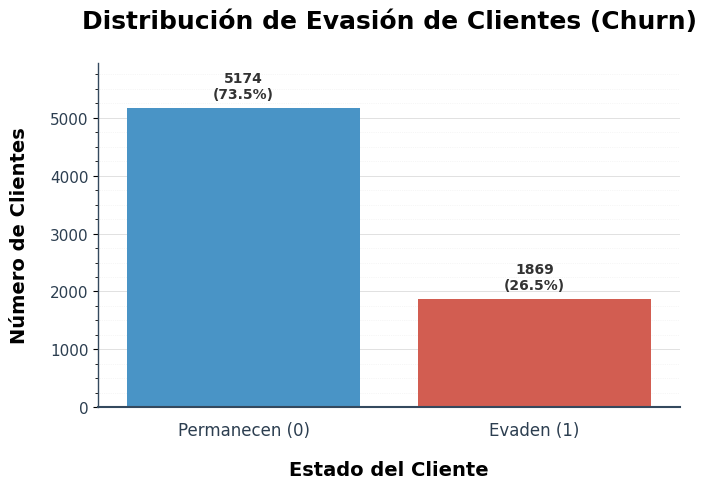

In [18]:
# VISUALIZACI√ìN MEJORADA DE LA DISTRIBUCI√ìN DE CHURN (CON GRID FINA)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # Necesario para los locators

col_churn = 'churn' 

if not df.empty and col_churn in df.columns:
    plt.figure(figsize=(7, 5))
    
    churn_labels_for_plot = df[col_churn].map({0: 'Permanecen (0)', 1: 'Evaden (1)'})
    
    ax = sns.countplot(
        x=churn_labels_for_plot,
        hue=churn_labels_for_plot, 
        palette=['#3498db', '#e74c3c'],
        order=['Permanecen (0)', 'Evaden (1)'],
        legend=False
    )
    
    plt.title('Distribuci√≥n de Evasi√≥n de Clientes (Churn)', 
              fontsize=18, fontweight='bold', pad=25) # Aument√© un poco el pad y fontsize
    plt.xlabel('Estado del Cliente', fontsize=14, fontweight='bold', labelpad=15) # labelpad para espacio
    plt.ylabel('N√∫mero de Clientes', fontsize=14, fontweight='bold', labelpad=15) # labelpad para espacio
    
    total = len(df[col_churn])
    max_height = 0 # Para calcular el l√≠mite superior del eje Y
    
    for p in ax.patches:
        count = int(p.get_height())
        if count > max_height: # Actualizar max_height
            max_height = count
        percentage = f'{100 * count / total:.1f}%'
        
        ax.annotate(f'{count}\n({percentage})', 
                    (p.get_x() + p.get_width() / 2., count), 
                    ha='center',
                    va='bottom', 
                    fontsize=10, # Ligeramente m√°s peque√±o para no saturar
                    fontweight='bold',
                    color='#333333', # Un gris oscuro para el texto
                    xytext=(0, 5),  # 5 puntos arriba de la barra
                    textcoords='offset points')
    
    ax.set_ylim(0, max_height * 1.15) # 15% m√°s espacio arriba para el texto

    # --- ESTILO DE SPINES Y TICKS ---
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(False) # Considerar mantenerlo para referencia del eje Y si no poner grid fina
    
    ax.tick_params(axis='x', 
                   length=0, 
                   labelsize=12, # Ligeramente m√°s grande
                   labelcolor='#2c3e50',
                   pad=10) 
    
    ax.tick_params(axis='y', 
                   labelsize=11, # Ligeramente m√°s grande
                   labelcolor='#2c3e50',
                   left=True) # Mantener los ticks si se quiere grid fina

    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['bottom'].set_color('#34495e')
    ax.spines['left'].set_linewidth(1.0) # Si decido mantenerlo
    ax.spines['left'].set_color('#34495e') # Si decido mantenerlo

    # --- CONFIGURACI√ìN DE LA GRID FINA ---
    # Grid principal (l√≠neas m√°s gruesas o visibles)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.7, alpha=0.6, color='#cccccc') # Grid principal m√°s visible
    
    # Grid secundaria/fina (l√≠neas m√°s sutiles entre las principales)
    # Para esto, a menudo necesito definir los locators.
    # Por ejemplo, si quiero una l√≠nea cada 500 clientes y una m√°s fina cada 100:
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1000)) # L√≠nea principal cada 1000
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=250))  # L√≠nea fina cada 250

    # Mostrar la grid menor (fina)
    ax.grid(which='minor', axis='y', linestyle=':', linewidth=0.5, alpha=0.5, color='#dddddd')
    
    # Asegurame que la grid est√© detr√°s de las barras
    ax.set_axisbelow(True)
    
    # Quitar la l√≠nea duplicada de plt.grid(True) que ten√≠a al final
    # La configuraci√≥n de ax.yaxis.grid() y ax.grid(which='minor'...) es m√°s espec√≠fica.
    
    plt.tight_layout() # Ajustar para que todo quepa bien
    plt.show()
    
else:
    print("DataFrame vac√≠o o la columna 'churn' no existe.")

---
#### 3.2.2. Distribuci√≥n de Evasi√≥n (Churn) por Variables Categ√≥ricas

##### A. Conteos Absolutos de Churn por Categor√≠a
Exploramos c√≥mo se distribuye la evasi√≥n (churn) seg√∫n diferentes caracter√≠sticas categ√≥ricas de los clientes.

--- AN√ÅLISIS DE EVASI√ìN POR VARIABLES CATEG√ìRICAS (CONTEOS) ---


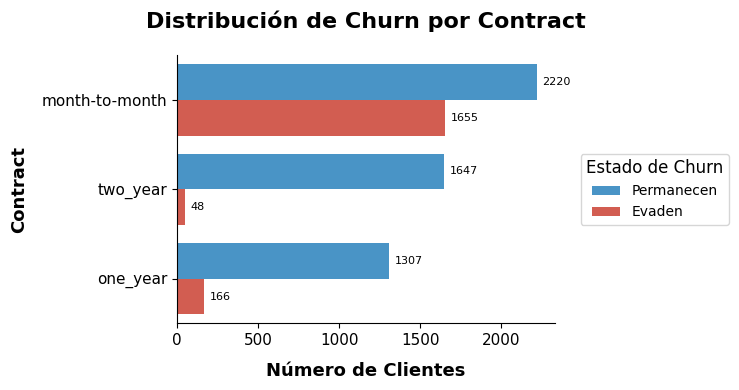

----------------------------------------------------------------------


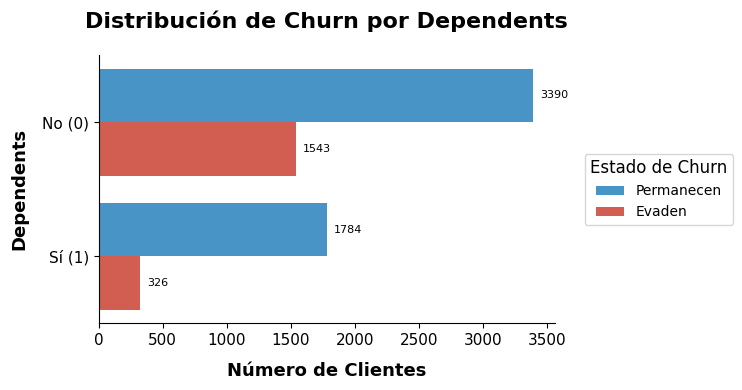

----------------------------------------------------------------------


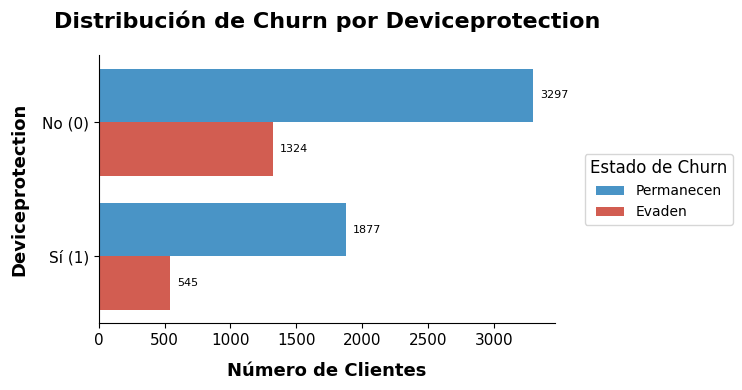

----------------------------------------------------------------------


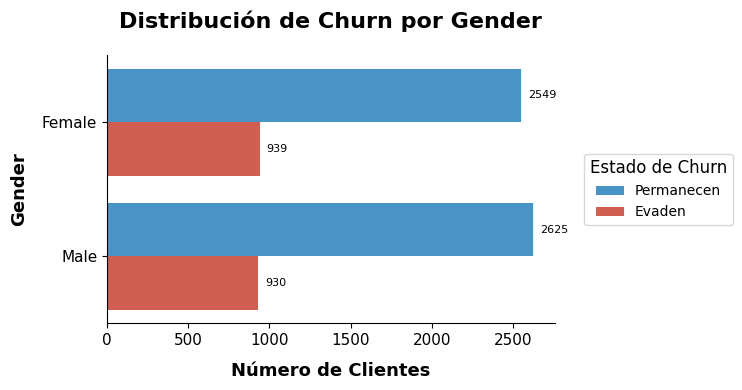

----------------------------------------------------------------------


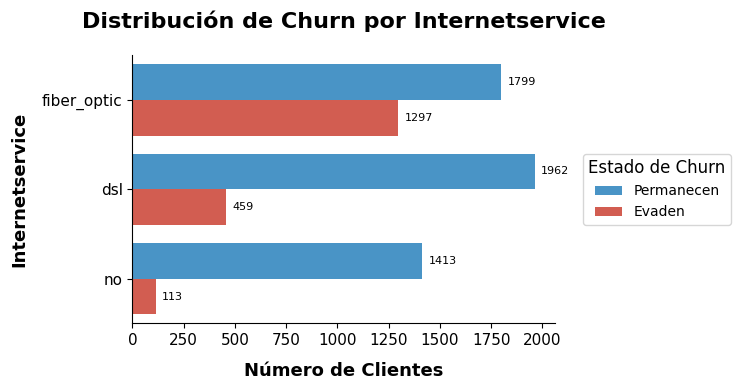

----------------------------------------------------------------------


----------------------------------------------------------------------


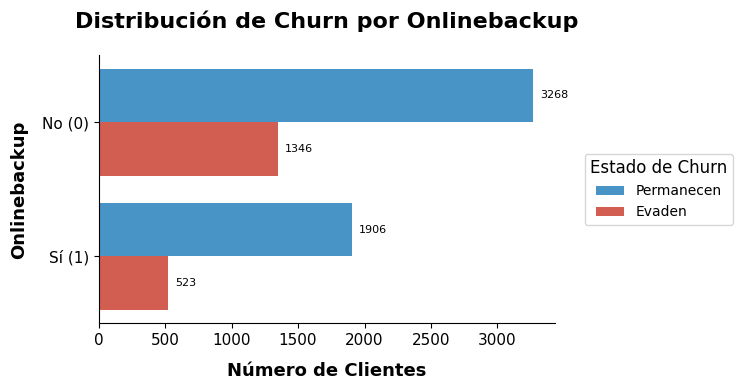

----------------------------------------------------------------------


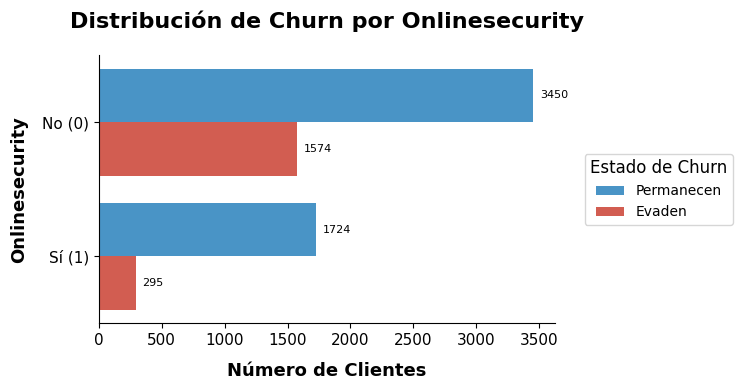

----------------------------------------------------------------------


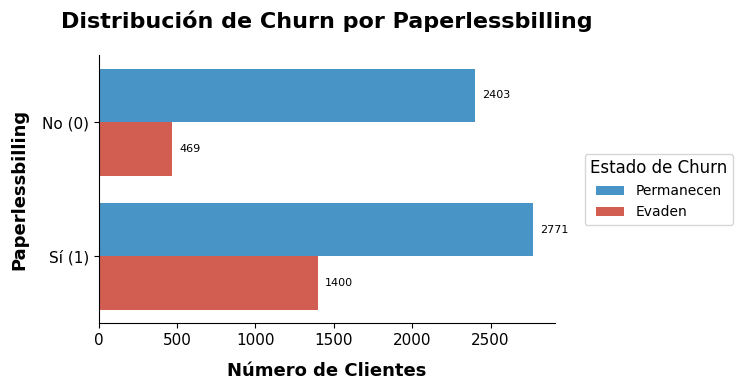

----------------------------------------------------------------------


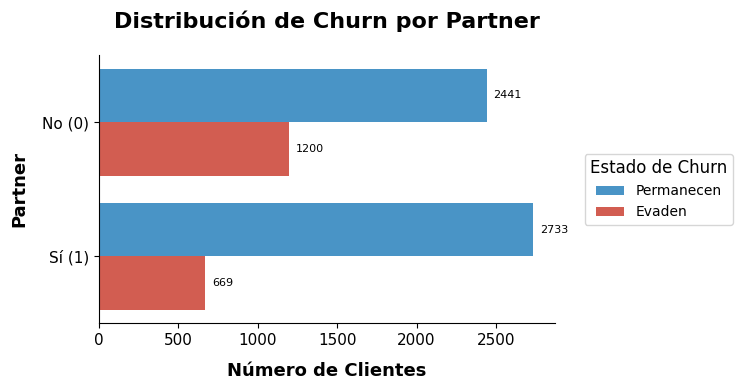

----------------------------------------------------------------------


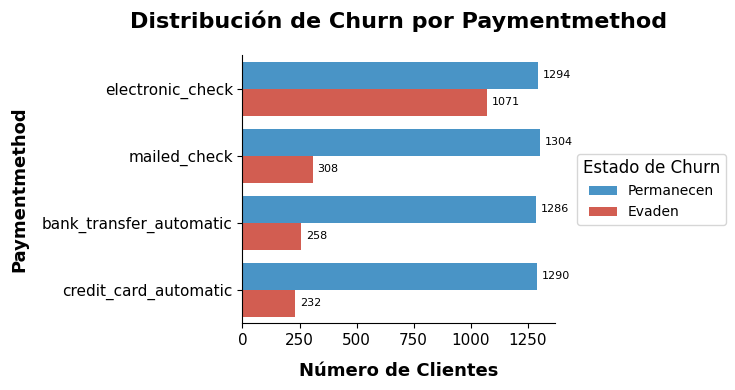

----------------------------------------------------------------------


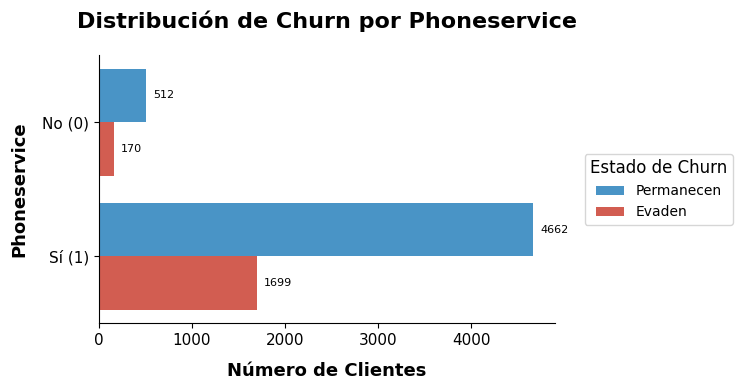

----------------------------------------------------------------------


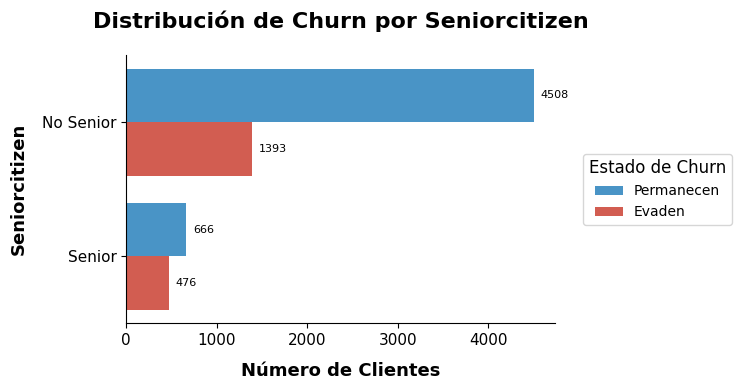

----------------------------------------------------------------------


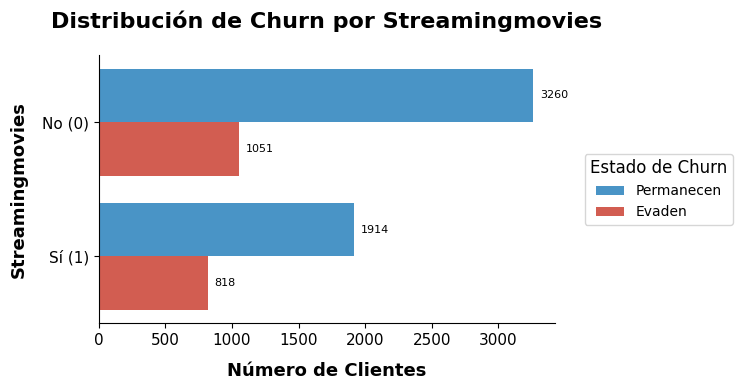

----------------------------------------------------------------------


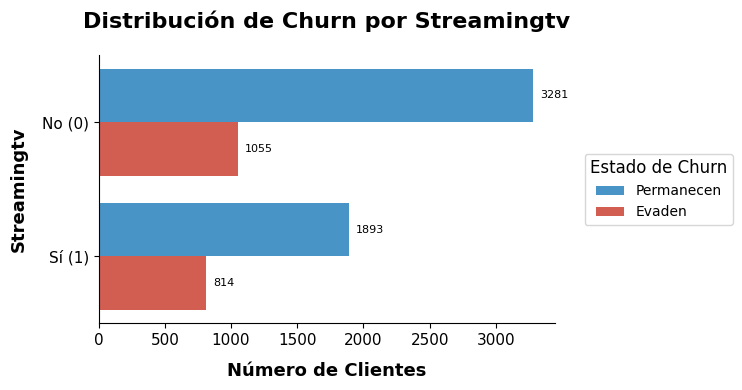

----------------------------------------------------------------------


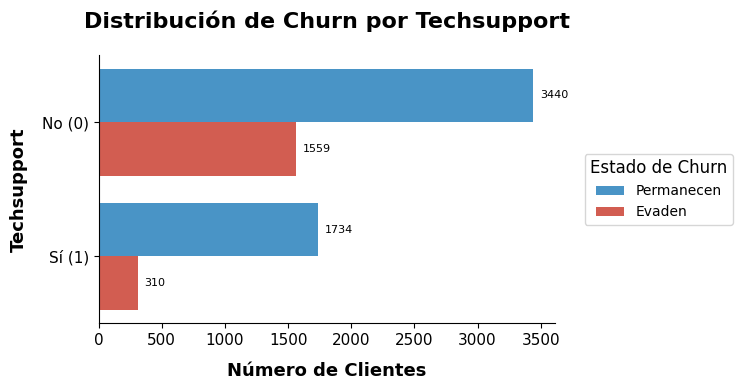

----------------------------------------------------------------------


In [19]:
# VISUALIZACI√ìN DE CHURN POR VARIABLES CATEG√ìRICAS (COUNTPLOTS MEJORADOS) CON ANOTACIONES

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display

col_churn = 'churn'

if not df.empty and col_churn in df.columns:
    print("--- AN√ÅLISIS DE EVASI√ìN POR VARIABLES CATEG√ìRICAS (CONTEOS) ---")
    
    categorical_multivalue_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
    if 'customerid' in categorical_multivalue_cols:
        categorical_multivalue_cols.remove('customerid')

    binary_cols_as_cat_for_plot = [
        'gender', 'seniorcitizen', 'partner', 'dependents', 
        'phoneservice', 'multiplelines', 'onlinesecurity', 
        'onlinebackup', 'deviceprotection', 'techsupport', 
        'streamingtv', 'streamingmovies', 'paperlessbilling'
    ]
    binary_cols_as_cat_for_plot = [col for col in binary_cols_as_cat_for_plot if col in df.columns]
    
    features_to_analyze = sorted(list(set(categorical_multivalue_cols + binary_cols_as_cat_for_plot)))

    churn_legend_map = {0: 'Permanecen', 1: 'Evaden'}

    for feature in features_to_analyze:
        if feature in df.columns and feature != col_churn:
            
            data_plot_cat = df.copy()
            order_for_plot = None
            feature_label = feature.capitalize().replace("_", " ")

            if data_plot_cat[feature].dtype in ['int64', 'Int64'] and df[feature].nunique() == 2:
                unique_vals_feat = sorted(df[feature].dropna().unique().tolist())
                if len(unique_vals_feat) == 2 and all(isinstance(x, (int, np.integer)) for x in unique_vals_feat):
                    map_dict_feat = {unique_vals_feat[0]: f'No ({unique_vals_feat[0]})', 
                                     unique_vals_feat[1]: f'S√≠ ({unique_vals_feat[1]})'}
                    if feature == 'gender': map_dict_feat = {0: 'Female', 1: 'Male'}
                    elif feature == 'seniorcitizen': map_dict_feat = {0: 'No Senior', 1: 'Senior'}
                    
                    data_plot_cat[feature] = data_plot_cat[feature].map(map_dict_feat)
                    # Asegurarme de que el orden solo incluya valores presentes despu√©s del mapeo
                    order_for_plot = [val for val in [map_dict_feat.get(uv) for uv in unique_vals_feat] if val is not None]

            if order_for_plot is None or not order_for_plot: # Si el orden no se pudo determinar o est√° vac√≠o
                order_for_plot = data_plot_cat[feature].value_counts().index.tolist()


            plt.figure(figsize=(9, max(4, len(order_for_plot) * 0.6) ))
            
            ax = sns.countplot(
                data=data_plot_cat, 
                y=feature, # Barras horizontales
                hue=df[col_churn].map(churn_legend_map),
                palette={'Permanecen': '#3498db', 'Evaden': '#e74c3c'},
                order=order_for_plot
            )
            
            plt.title(f'Distribuci√≥n de Churn por {feature_label}', fontsize=16, fontweight='bold', pad=20)
            plt.xlabel('N√∫mero de Clientes', fontsize=13, fontweight='bold', labelpad=10)
            plt.ylabel(feature_label, fontsize=13, fontweight='bold', labelpad=10)
            
            ax.tick_params(axis='both', labelsize=11)
            sns.despine()

            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels, title='Estado de Churn', title_fontsize='12', 
                      loc='center left', bbox_to_anchor=(1.05, 0.5))

            # --- Bloque de Anotaciones DESCOMENTADO y AJUSTADO para barras horizontales ---
            for p in ax.patches: # ax.patches son las barras individuales
                width = p.get_width() # Para barras horizontales, la longitud es el ancho
                if width > 0: # Solo anotar si la barra tiene un ancho visible
                    # Posici√≥n x: un poco a la derecha del final de la barra
                    # Posici√≥n y: en el centro vertical de la barra
                    ax.text(width + (ax.get_xlim()[1] * 0.015), # Peque√±o offset desde el final de la barra
                            p.get_y() + p.get_height() / 2.,   # Centro vertical de la barra
                            f'{int(width)}',                   # El texto a mostrar (el conteo)
                            ha='left',                         # Alineaci√≥n horizontal
                            va='center',                       # Alineaci√≥n vertical
                            fontsize=8,                        # Tama√±o de fuente para las anotaciones
                            color='black')                     # Color del texto
            # ----------------------------------------------------------------------------
            
            plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar para que quepa la leyenda
            plt.show()
            print("-" * 70)
else:
    print(f"DataFrame vac√≠o o la columna '{col_churn}' no disponible.")

---
##### B. Tasas de Evasi√≥n por Categor√≠a
Para profundizar, calculamos y visualizamos la tasa de evasi√≥n espec√≠fica para cada categor√≠a de las variables.



--- AN√ÅLISIS DE TASA DE EVASI√ìN Y PROPORCIONES POR VARIABLES CATEG√ìRICAS ---


--- An√°lisis Comparativo para: Contract ---


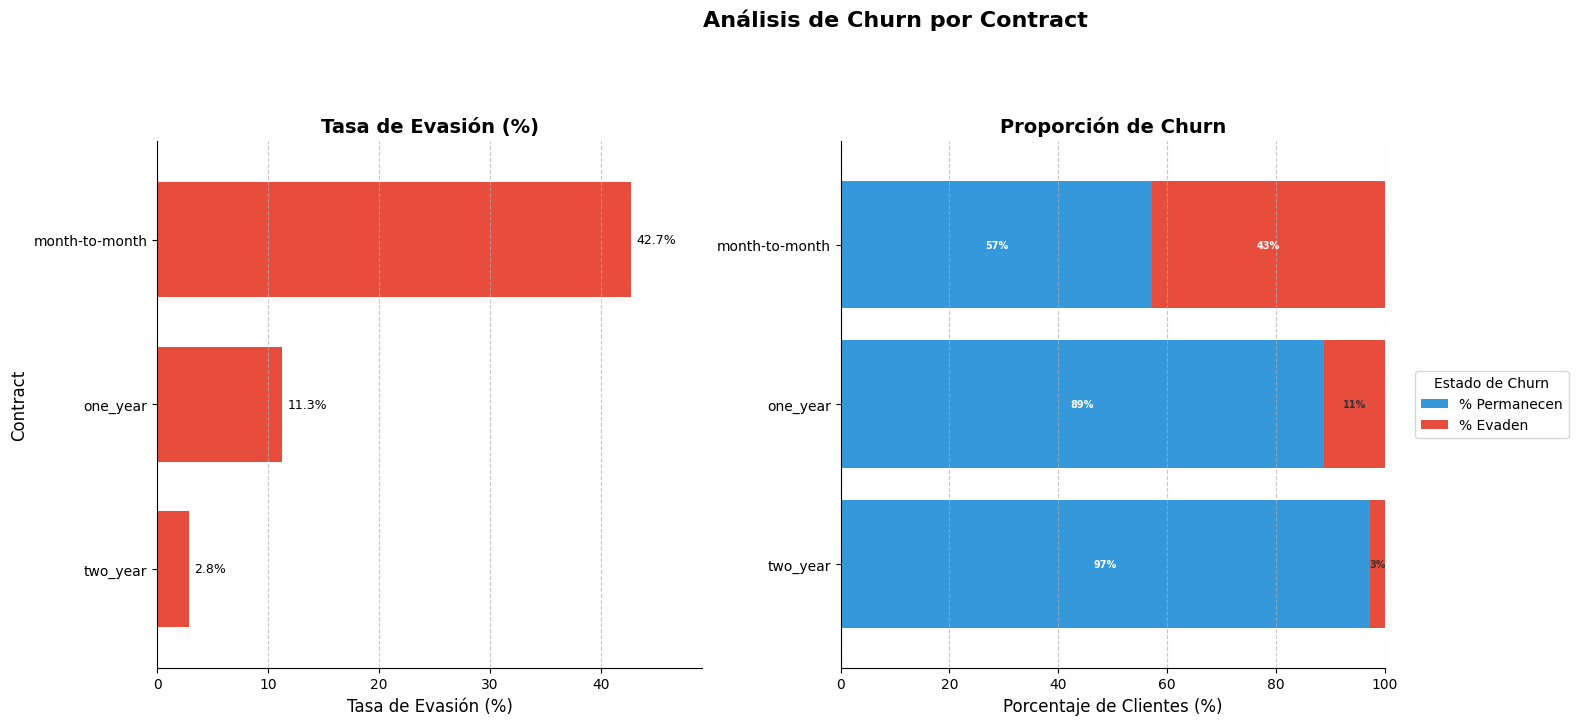


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn           % Permanecen   % Evaden
contract                               
two_year           97.168142   2.831858
one_year           88.730482  11.269518
month-to-month     57.290323  42.709677

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Dependents ---


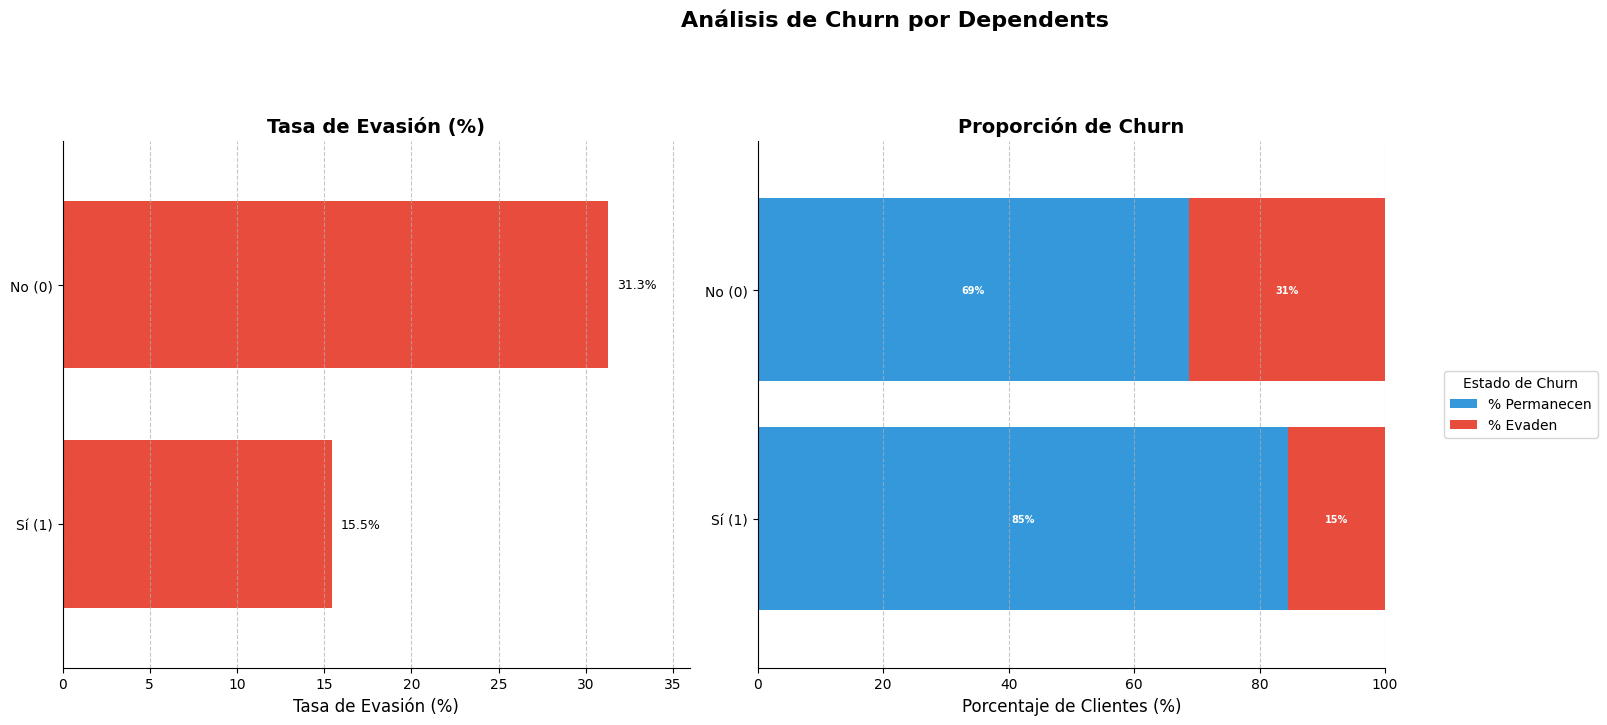


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn       % Permanecen   % Evaden
dependents                         
1              84.549763  15.450237
0              68.720860  31.279140

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Deviceprotection ---


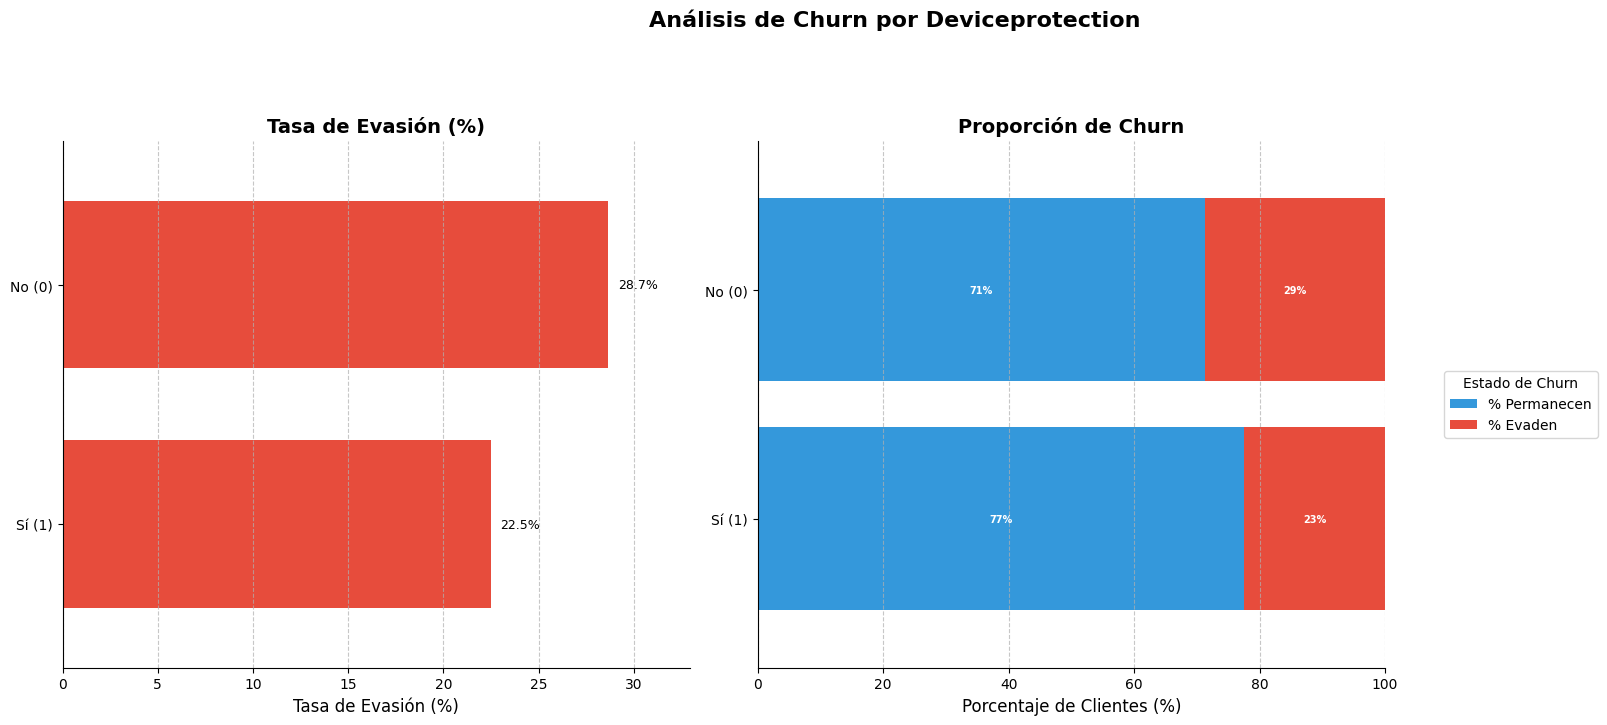


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn             % Permanecen   % Evaden
deviceprotection                         
1                    77.497936  22.502064
0                    71.348193  28.651807

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Gender ---


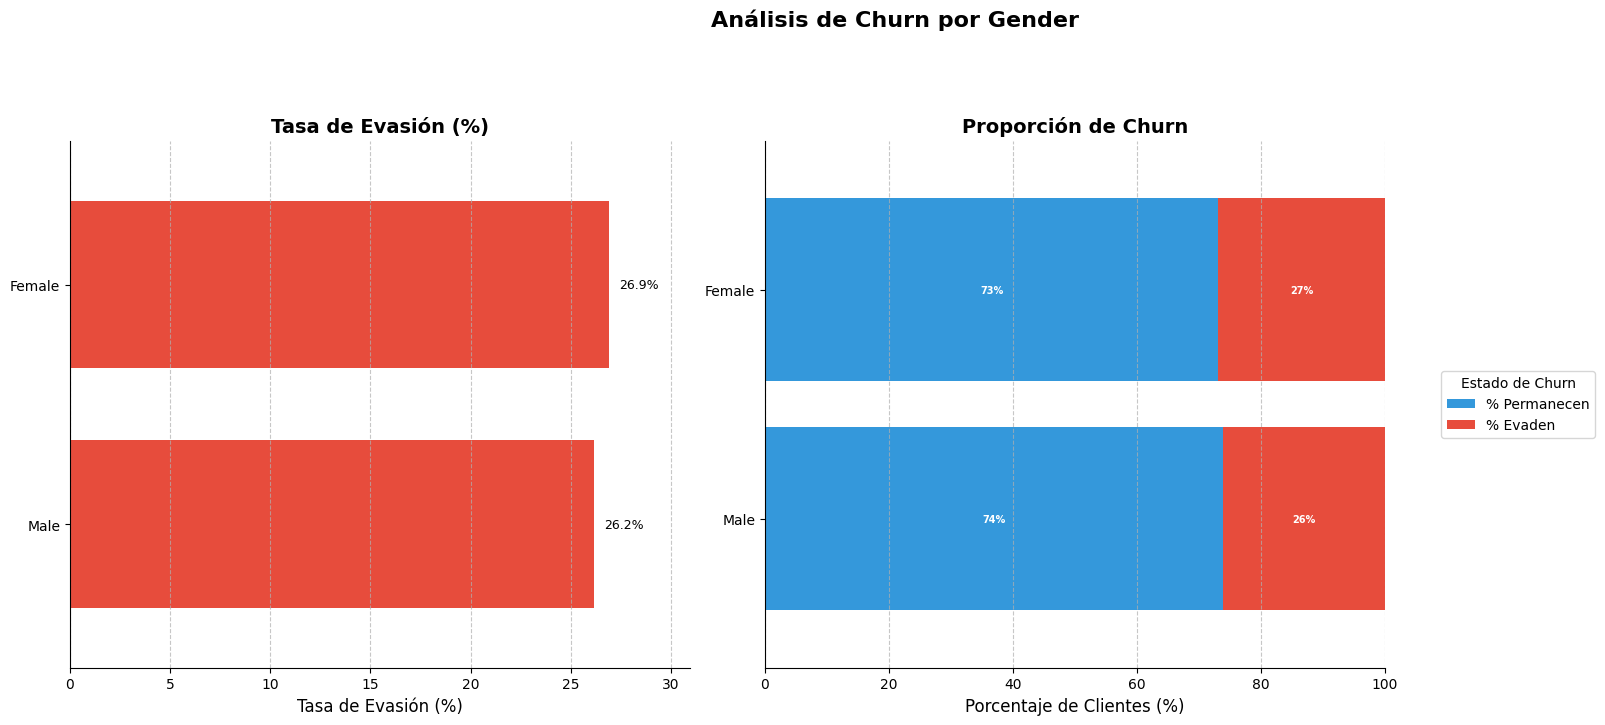


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn   % Permanecen   % Evaden
gender                         
1          73.839662  26.160338
0          73.079128  26.920872

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Internetservice ---



Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn            % Permanecen   % Evaden
internetservice                         
no                  92.595020   7.404980
dsl                 81.040892  18.959108
fiber_optic         58.107235  41.892765

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Multiplelines ---



Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn          % Permanecen   % Evaden
multiplelines                         
0                 74.975442  25.024558
1                 71.390104  28.609896

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Onlinebackup ---


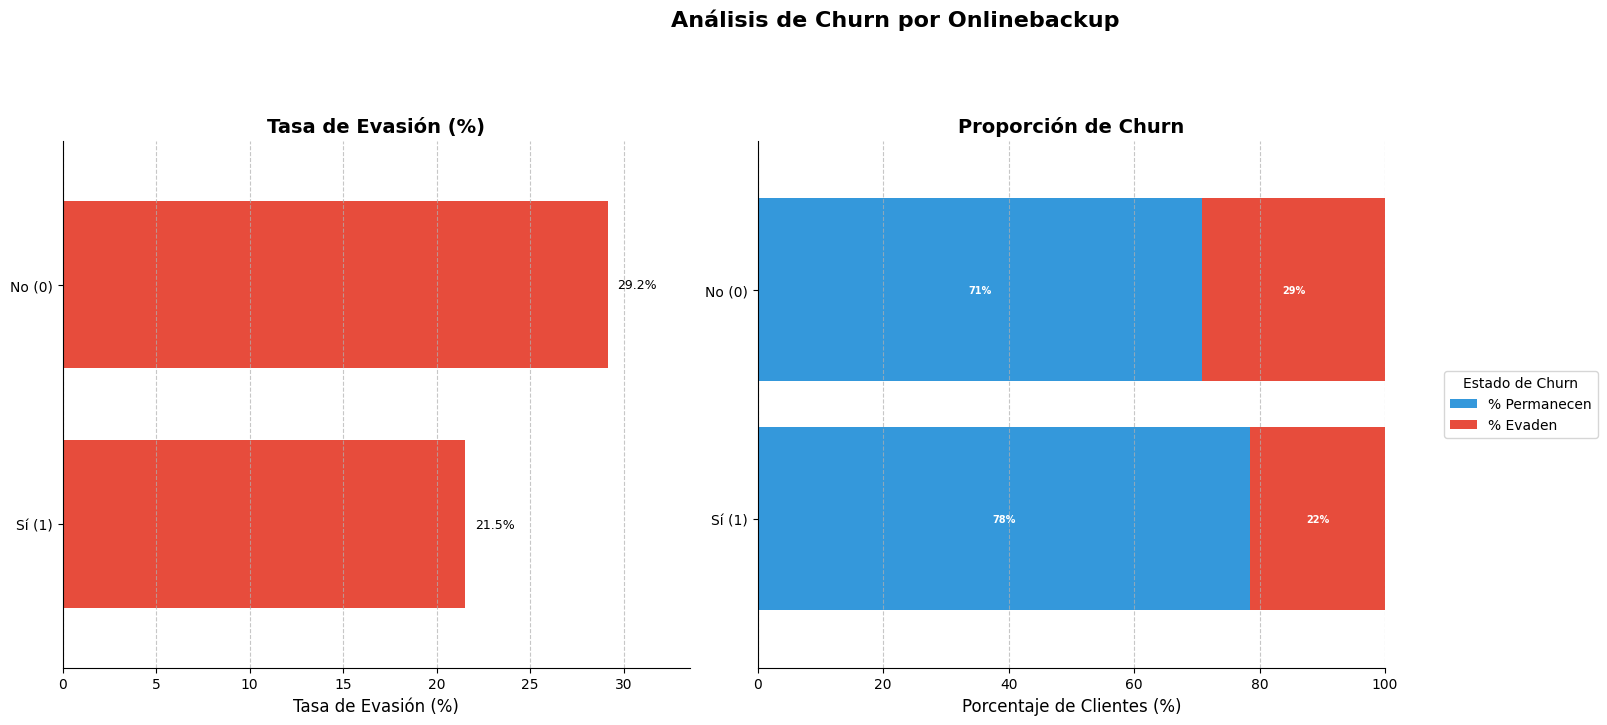


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn         % Permanecen   % Evaden
onlinebackup                         
1                78.468506  21.531494
0                70.827915  29.172085

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Onlinesecurity ---


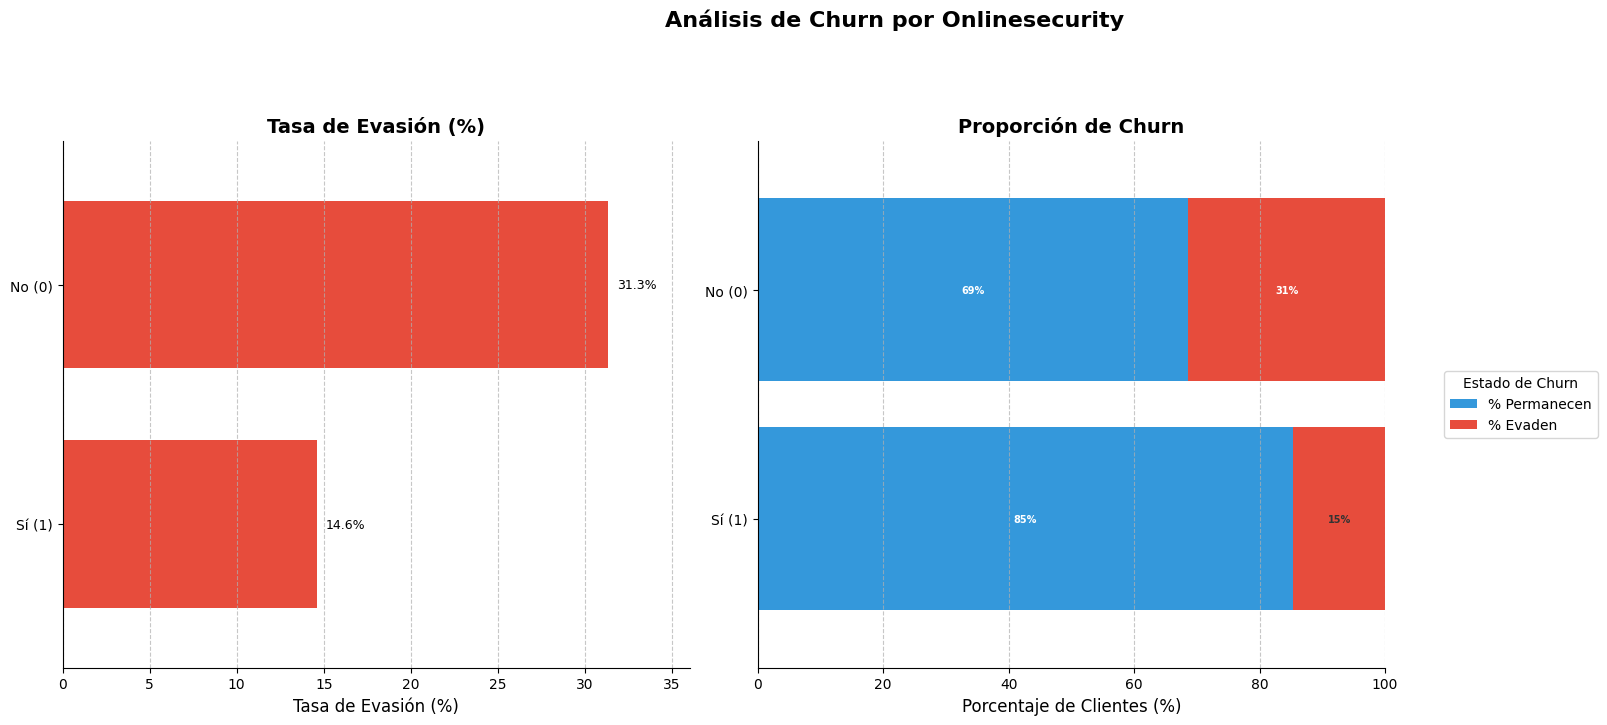


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn           % Permanecen   % Evaden
onlinesecurity                         
1                  85.388806  14.611194
0                  68.670382  31.329618

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Paperlessbilling ---



Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn             % Permanecen   % Evaden
paperlessbilling                         
0                    83.669916  16.330084
1                    66.434908  33.565092

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Partner ---


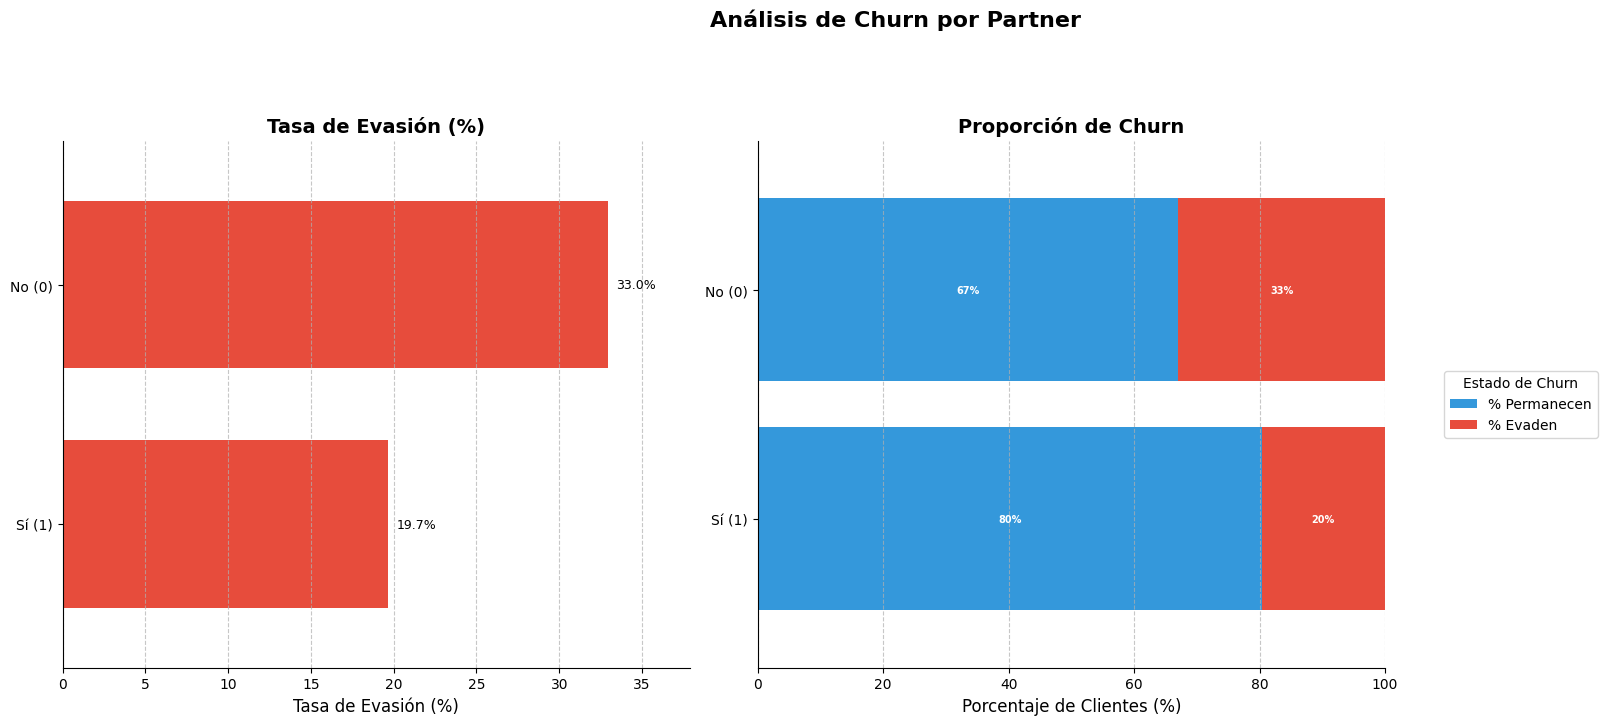


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn    % Permanecen   % Evaden
partner                         
1           80.335097  19.664903
0           67.042021  32.957979

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Paymentmethod ---



Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn                    % Permanecen   % Evaden
paymentmethod                                   
credit_card_automatic       84.756899  15.243101
bank_transfer_automatic     83.290155  16.709845
mailed_check                80.893300  19.106700
electronic_check            54.714588  45.285412

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Phoneservice ---


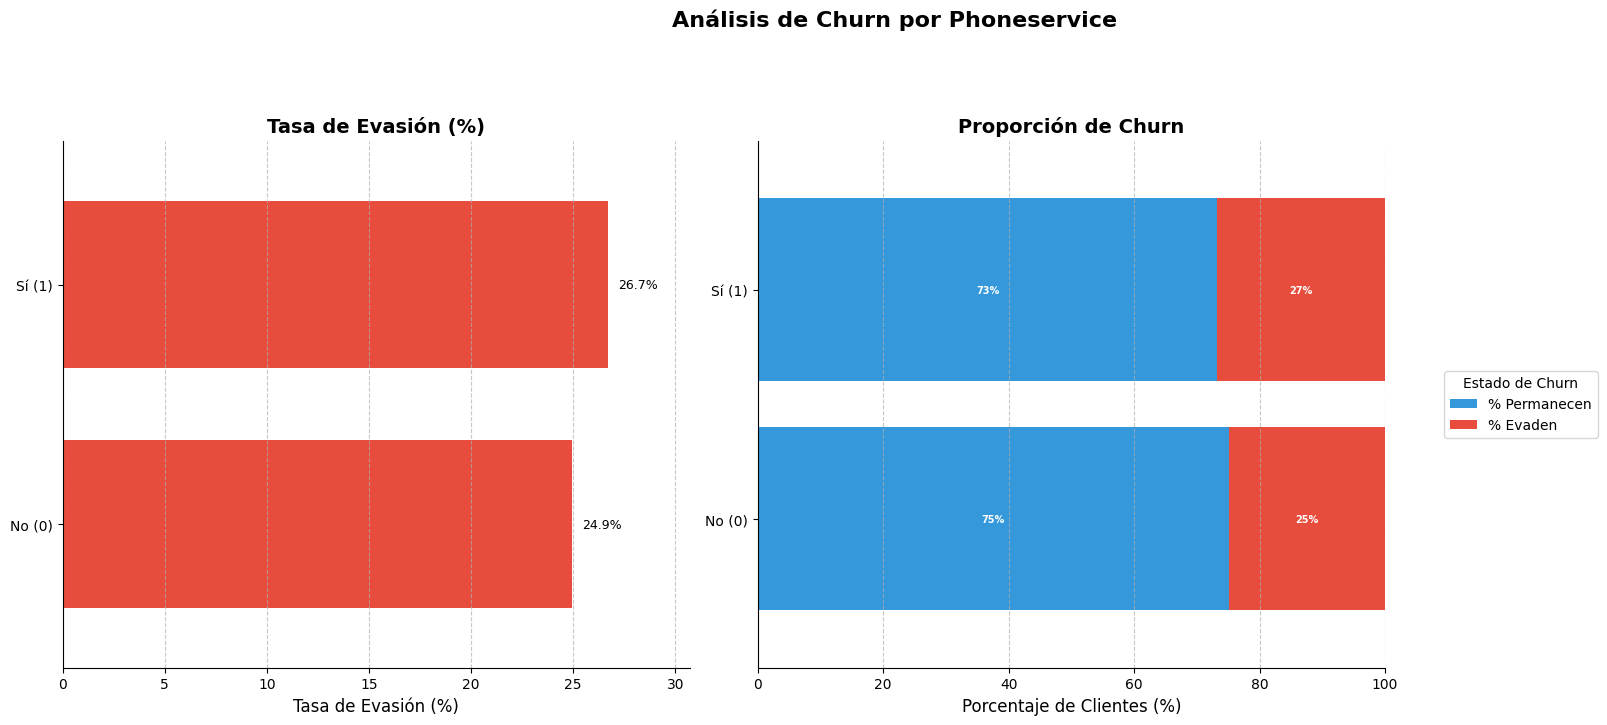


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn         % Permanecen   % Evaden
phoneservice                         
0                75.073314  24.926686
1                73.290363  26.709637

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Seniorcitizen ---


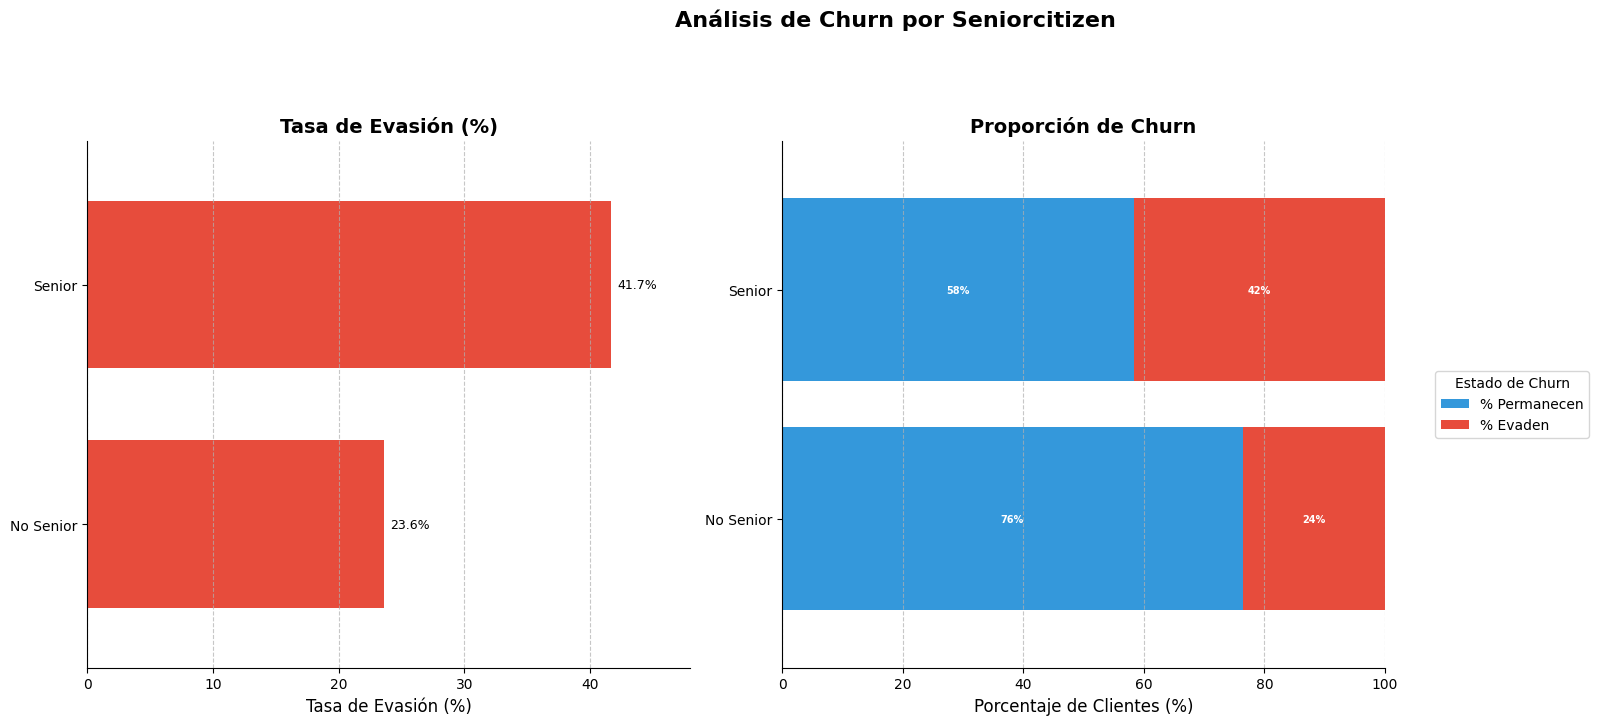


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn          % Permanecen   % Evaden
seniorcitizen                         
0                 76.393832  23.606168
1                 58.318739  41.681261

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Streamingmovies ---


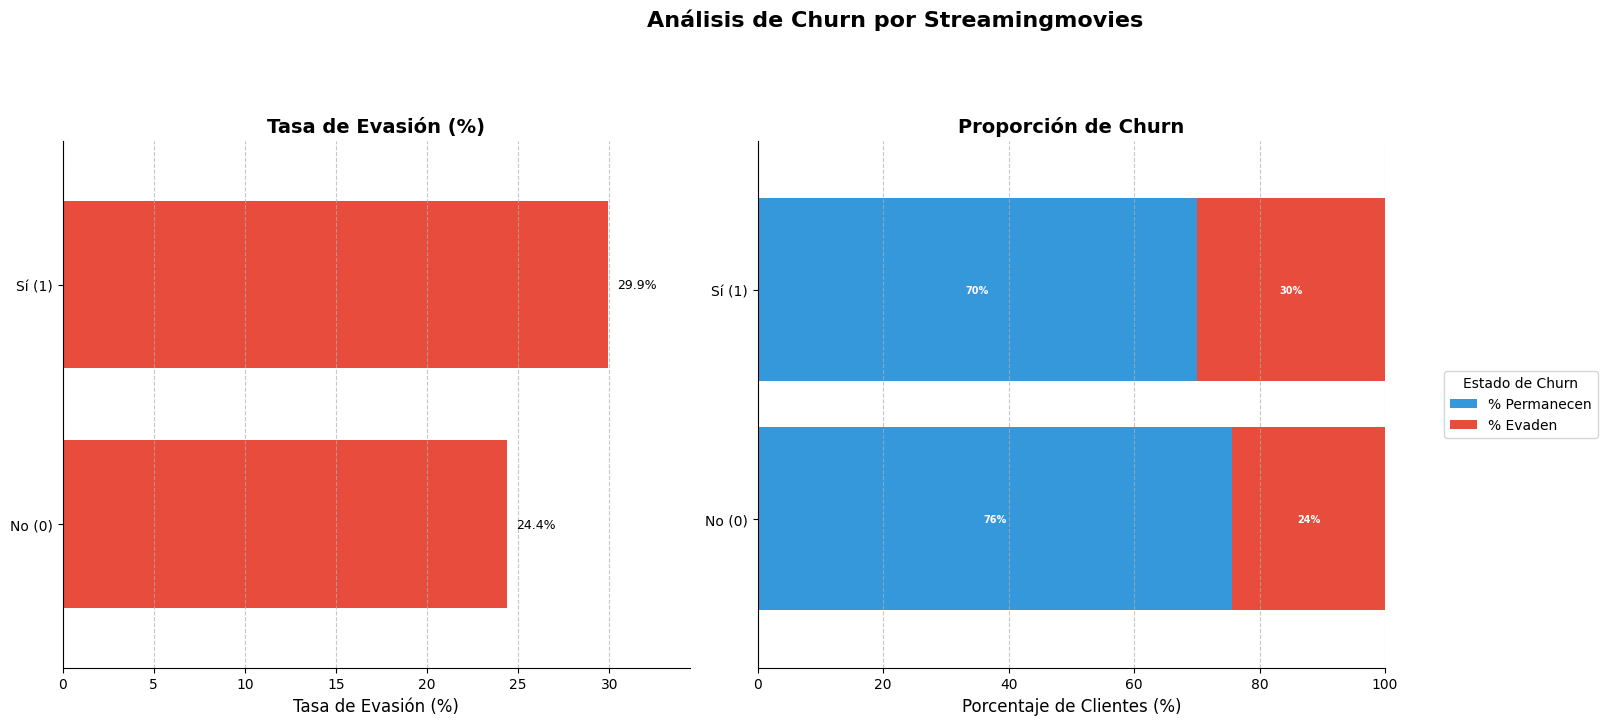


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn            % Permanecen   % Evaden
streamingmovies                         
0                   75.620506  24.379494
1                   70.058565  29.941435

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Streamingtv ---


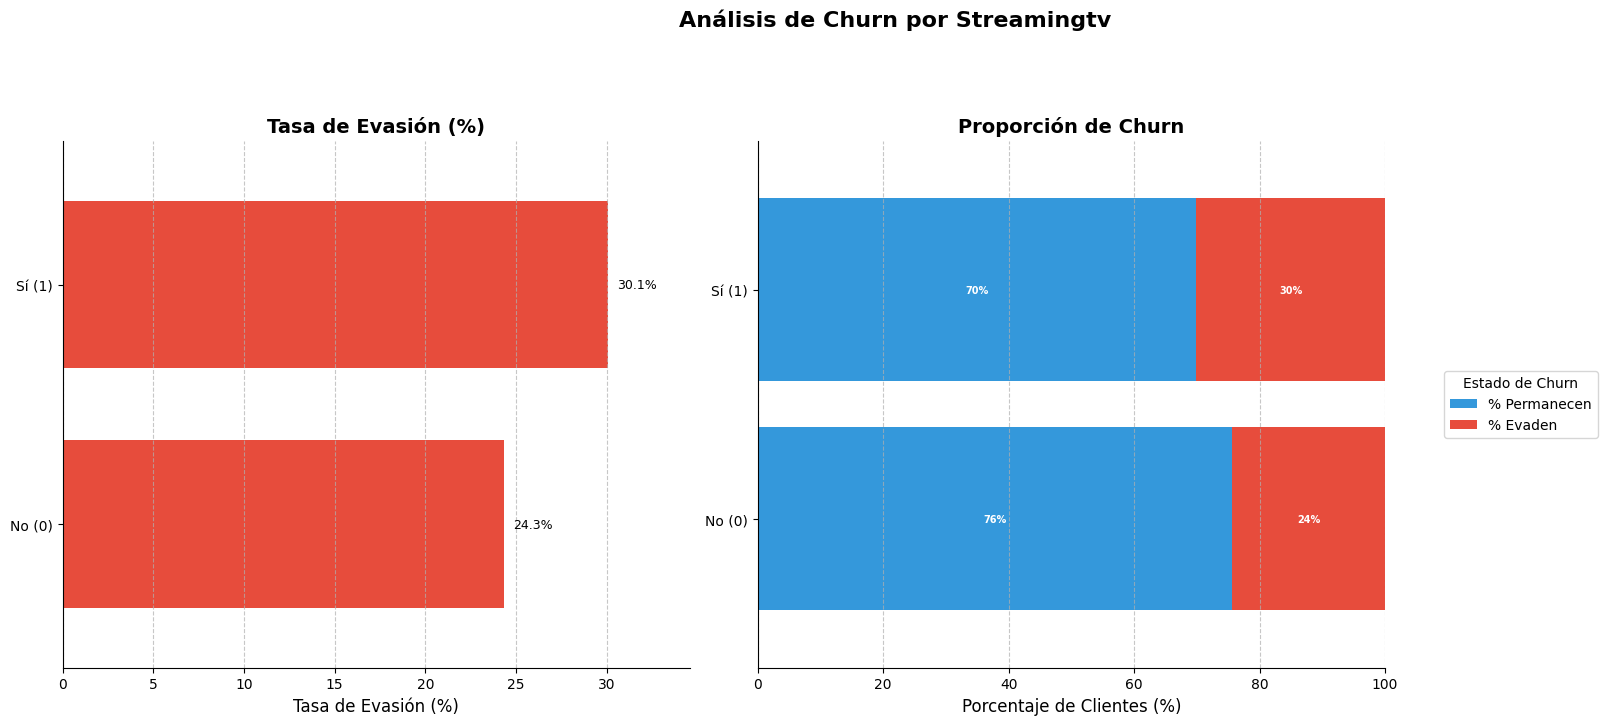


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn        % Permanecen   % Evaden
streamingtv                         
0               75.668819  24.331181
1               69.929812  30.070188

----------------------------------------------------------------------


--- An√°lisis Comparativo para: Techsupport ---


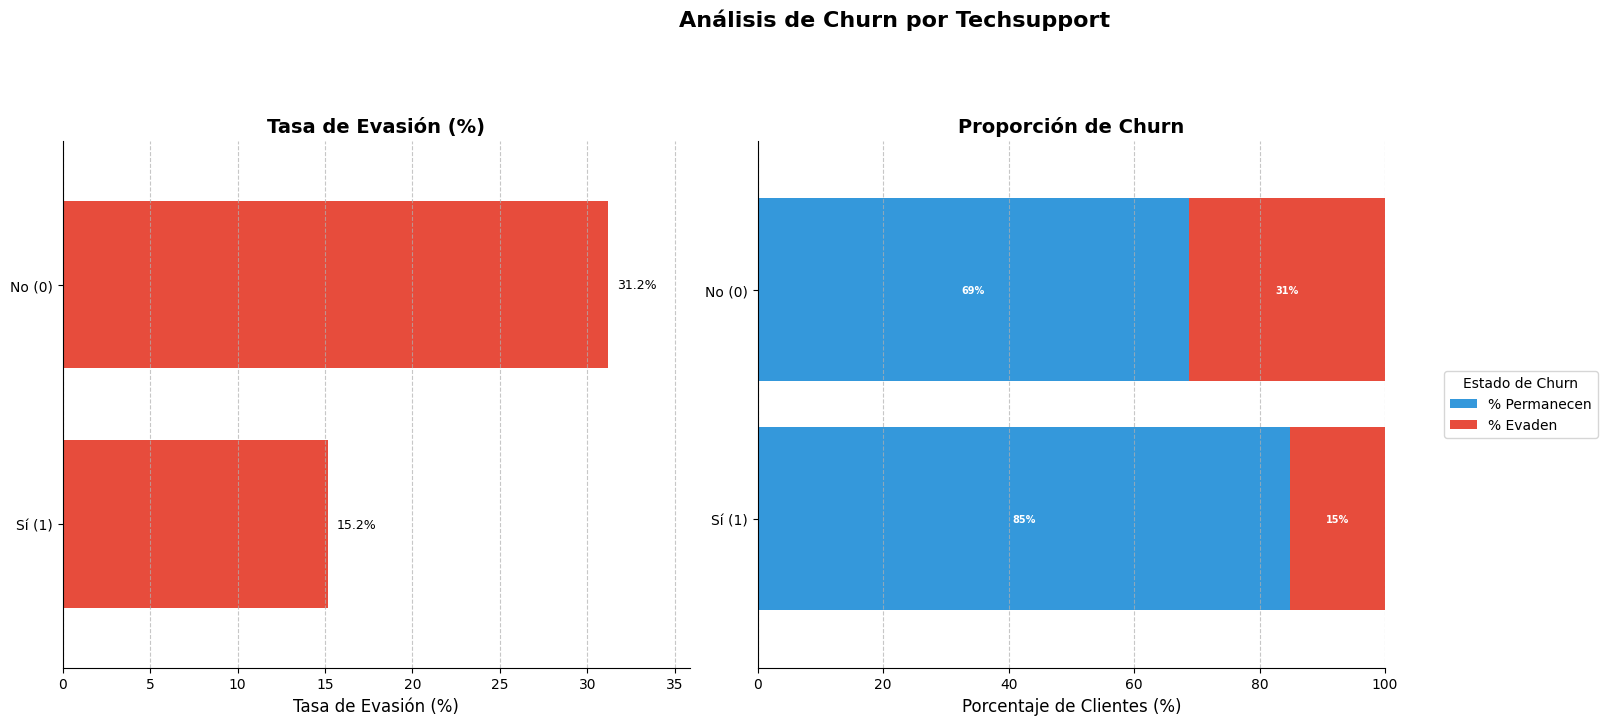


Porcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):


churn        % Permanecen   % Evaden
techsupport                         
1               84.833659  15.166341
0               68.813763  31.186237

----------------------------------------------------------------------


In [20]:
# TASAS DE EVASI√ìN Y GR√ÅFICOS APILADOS (ALINEADOS HORIZONTALMENTE - ALTURA AJUSTADA)

col_churn = 'churn'

if not df.empty and col_churn in df.columns:
    print("\n--- AN√ÅLISIS DE TASA DE EVASI√ìN Y PROPORCIONES POR VARIABLES CATEG√ìRICAS ---")

    if 'features_to_analyze' not in locals(): 
        categorical_multivalue_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
        if 'customerid' in categorical_multivalue_cols: categorical_multivalue_cols.remove('customerid')
        binary_cols_as_cat_for_plot = [
            'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 
            'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 
            'streamingtv', 'streamingmovies', 'paperlessbilling'
        ]
        binary_cols_as_cat_for_plot = [col for col in binary_cols_as_cat_for_plot if col in df.columns]
        features_to_analyze = sorted(list(set(categorical_multivalue_cols + binary_cols_as_cat_for_plot)))

    for feature in features_to_analyze:
        if feature in df.columns and feature != col_churn:
            feature_label = feature.capitalize().replace("_", " ")

            if df[feature].isnull().sum() == 0 and df[col_churn].isnull().sum() == 0:
                print(f"\n\n--- An√°lisis Comparativo para: {feature_label} ---")
                
                crosstab_norm = pd.crosstab(df[feature], df[col_churn], normalize='index') * 100
                crosstab_norm.rename(columns={0:'% Permanecen', 1:'% Evaden'}, inplace=True)
                
                plot_data_sorted_by_evasion = crosstab_norm.sort_values(by='% Evaden', ascending=True)
                y_labels_for_plot = plot_data_sorted_by_evasion.index
                
                if df[feature].dtype in ['int64', 'Int64'] and df[feature].nunique() == 2:
                     unique_vals_feat = sorted(df[feature].dropna().unique().tolist())
                     map_dict_feat_yaxis = {unique_vals_feat[0]: f'No ({unique_vals_feat[0]})', 
                                            unique_vals_feat[1]: f'S√≠ ({unique_vals_feat[1]})'}
                     if feature == 'gender': map_dict_feat_yaxis = {0: 'Female', 1: 'Male'}
                     elif feature == 'seniorcitizen': map_dict_feat_yaxis = {0: 'No Senior', 1: 'Senior'}
                     y_labels_for_plot = plot_data_sorted_by_evasion.index.map(map_dict_feat_yaxis)

                # --- AJUSTE DE ALTURA AQU√ç ---
                # Aumentar el multiplicador para dar m√°s espacio vertical por categor√≠a
                # Pruebar con valores como 0.6, 0.7, 0.8 o incluso 1.0
                height_multiplier = 2.0
                figure_height = max(7, plot_data_sorted_by_evasion.shape[0] * height_multiplier) # M√≠nimo 5 pulgadas de alto

                fig, axes = plt.subplots(1, 2, figsize=(18, figure_height)) 
                fig.suptitle(f'An√°lisis de Churn por {feature_label}', fontsize=16, fontweight='bold', y=1.03) # y un poco m√°s alto

                # --- SUBPLOT 1: Gr√°fico de barras de la Tasa de Evasi√≥n ---
                ax_rate = axes[0]
                plot_data_rate_values = plot_data_sorted_by_evasion['% Evaden']
                
                plot_data_rate_values.plot(kind='barh', color='#e74c3c', width=0.7, ax=ax_rate)
                ax_rate.set_title(f'Tasa de Evasi√≥n (%)', fontsize=14, fontweight='bold')
                ax_rate.set_xlabel('Tasa de Evasi√≥n (%)', fontsize=12)
                ax_rate.set_ylabel(feature_label if df[feature].dtype not in ['int64', 'Int64'] else "", fontsize=12)
                ax_rate.set_yticklabels(y_labels_for_plot)
                ax_rate.set_xlim(0, max(plot_data_rate_values.max() * 1.15, 25) if not plot_data_rate_values.empty else 100)

                for index, value in enumerate(plot_data_rate_values):
                    ax_rate.text(value + 0.5 , index, f'{value:.1f}%', va='center', ha='left', fontsize=9)
                sns.despine(ax=ax_rate)
                ax_rate.grid(axis='x', linestyle='--', alpha=0.7)

                # --- SUBPLOT 2: Gr√°fico de Barras Apiladas al 100% ---
                ax_stacked = axes[1]
                plot_data_stacked = plot_data_sorted_by_evasion[['% Permanecen', '% Evaden']]
                
                plot_data_stacked.plot(
                    kind='barh', 
                    stacked=True, 
                    color={'% Permanecen': '#3498db', '% Evaden': '#e74c3c'},
                    width=0.8,
                    ax=ax_stacked
                )
                ax_stacked.set_title(f'Proporci√≥n de Churn', fontsize=14, fontweight='bold')
                ax_stacked.set_xlabel('Porcentaje de Clientes (%)', fontsize=12)
                ax_stacked.set_ylabel("") 
                ax_stacked.set_yticklabels(y_labels_for_plot)
                ax_stacked.legend(title='Estado de Churn', loc='center right', bbox_to_anchor=(1.35, 0.5)) # Ajustar bbox_to_anchor
                ax_stacked.set_xlim(0, 100)
                
                for n, (idx, row) in enumerate(plot_data_stacked.iterrows()):
                    cumulative_width = 0
                    for i, (colname, value) in enumerate(row.items()):
                        if value > 2: # Reducido el umbral para anotaciones
                            current_bar_width = value 
                            label = f'{value:.0f}%'
                            x_pos = cumulative_width + current_bar_width / 2
                            text_color = 'white'
                            if current_bar_width < 15 : text_color = '#333333'
                            ax_stacked.text(x_pos, n, label, ha='center', va='center', color=text_color, fontsize=7, fontweight='bold')
                        cumulative_width += value
                
                sns.despine(ax=ax_stacked)
                ax_stacked.grid(axis='x', linestyle='--', alpha=0.7)

                plt.tight_layout(rect=[0, 0, 0.9, 0.95]) # Ajustar rect para suptitle y leyenda externa
                plt.show()
                
                print("\nPorcentaje de Evasi√≥n/Permanencia por categor√≠a (ordenado por % Evaden):")
                display(plot_data_sorted_by_evasion)
                print("-" * 70)
            else:
                print(f"Advertencia: La columna '{feature}' o '{col_churn}' contiene NaNs, omitiendo crosstab y gr√°ficos de tasas.")
        else:
            print(f"Advertencia: La columna categ√≥rica '{feature}' no existe en el DataFrame.")
else:
    print(f"DataFrame vac√≠o o la columna '{col_churn}' no disponible.")

---
#### 3.2.3. Distribuci√≥n de Evasi√≥n (Churn) por Variables Num√©ricas

Ahora exploraremos c√≥mo las variables num√©ricas clave (como la antig√ºedad del cliente (`tenure`), los cargos mensuales (`charges_monthly`), los cargos totales (`charges_total`) y los cargos diarios (`daily_charges`)) se distribuyen entre los clientes que cancelaron el servicio (evasi√≥n) y los que no lo hicieron.

Para este an√°lisis, utilizaremos dos tipos principales de visualizaciones para cada variable num√©rica:
*   **Histogramas con Curvas de Densidad (KDE):** Nos permitir√°n observar la forma de las distribuciones de cada variable para ambos grupos de clientes (los que evaden y los que permanecen), ayudando a identificar diferencias en la concentraci√≥n de valores.
*   **Boxplots (Diagramas de Caja y Bigotes):** Facilitar√°n la comparaci√≥n de las estad√≠sticas centrales (como la mediana y los cuartiles) entre los dos grupos, adem√°s de destacar la presencia de posibles valores at√≠picos (outliers).

El objetivo de esta subsecci√≥n es identificar si ciertos rangos o niveles de estas variables num√©ricas est√°n m√°s asociados con la evasi√≥n de clientes.

--- AN√ÅLISIS DE EVASI√ìN POR VARIABLES NUM√âRICAS (vs. 'churn') ---


--- An√°lisis para: Tenure ---


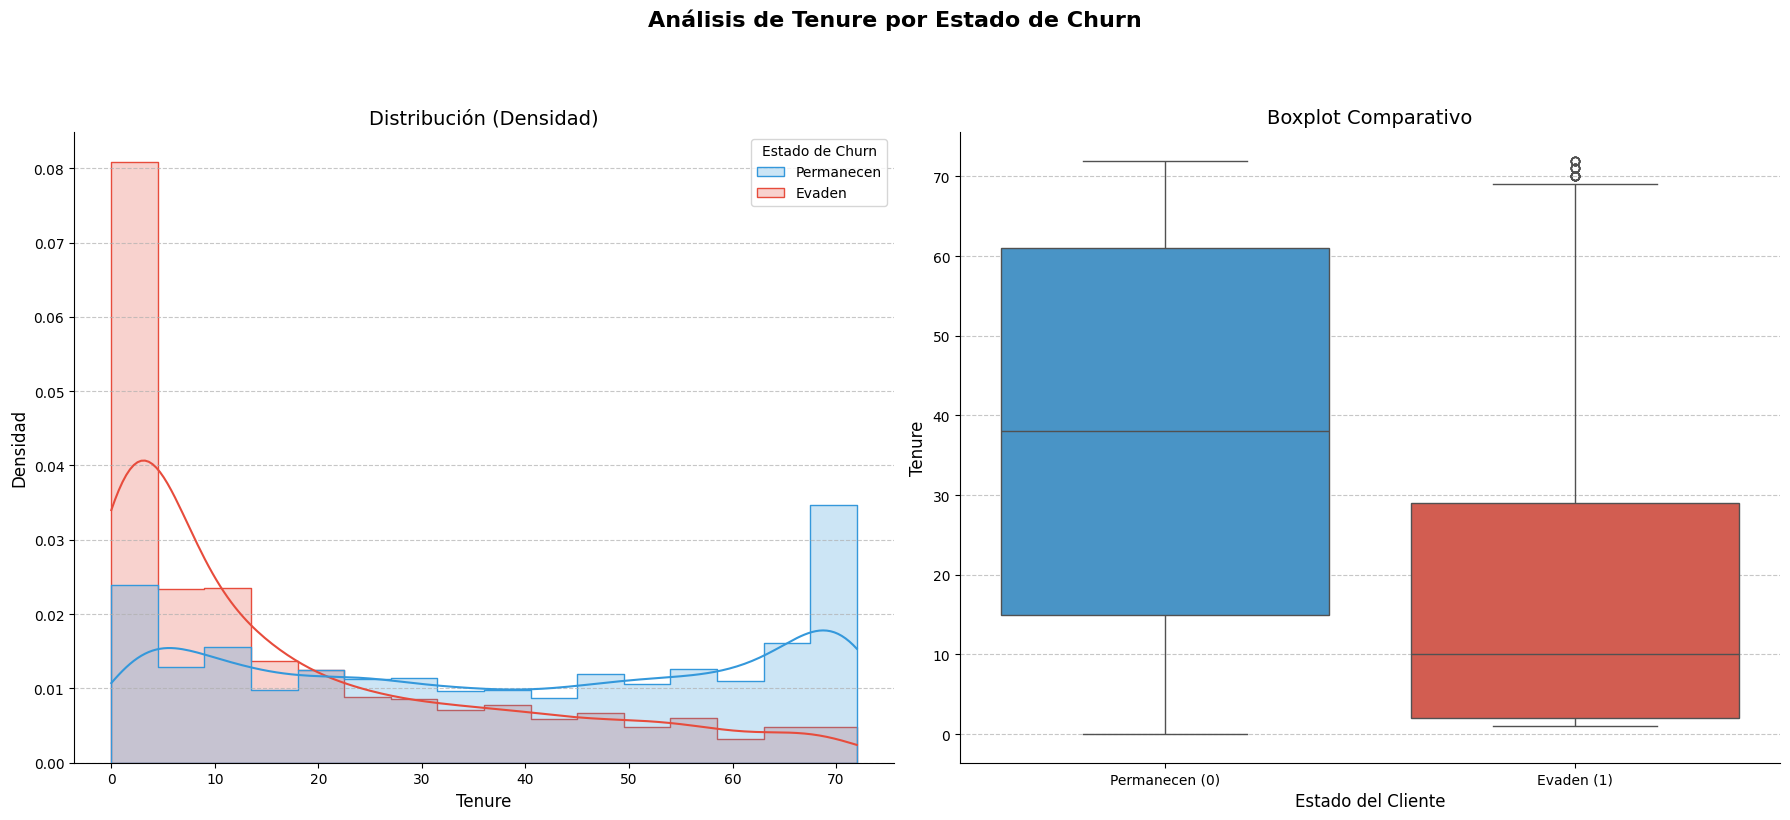


Estad√≠sticas de 'Tenure' agrupadas por Churn:


count       mean  median        std  min  max
churn                                                    
Evaden       1869  17.979133    10.0  19.531123    1   72
Permanecen   5174  37.569965    38.0  24.113777    0   72

----------------------------------------------------------------------


--- An√°lisis para: Charges monthly ---


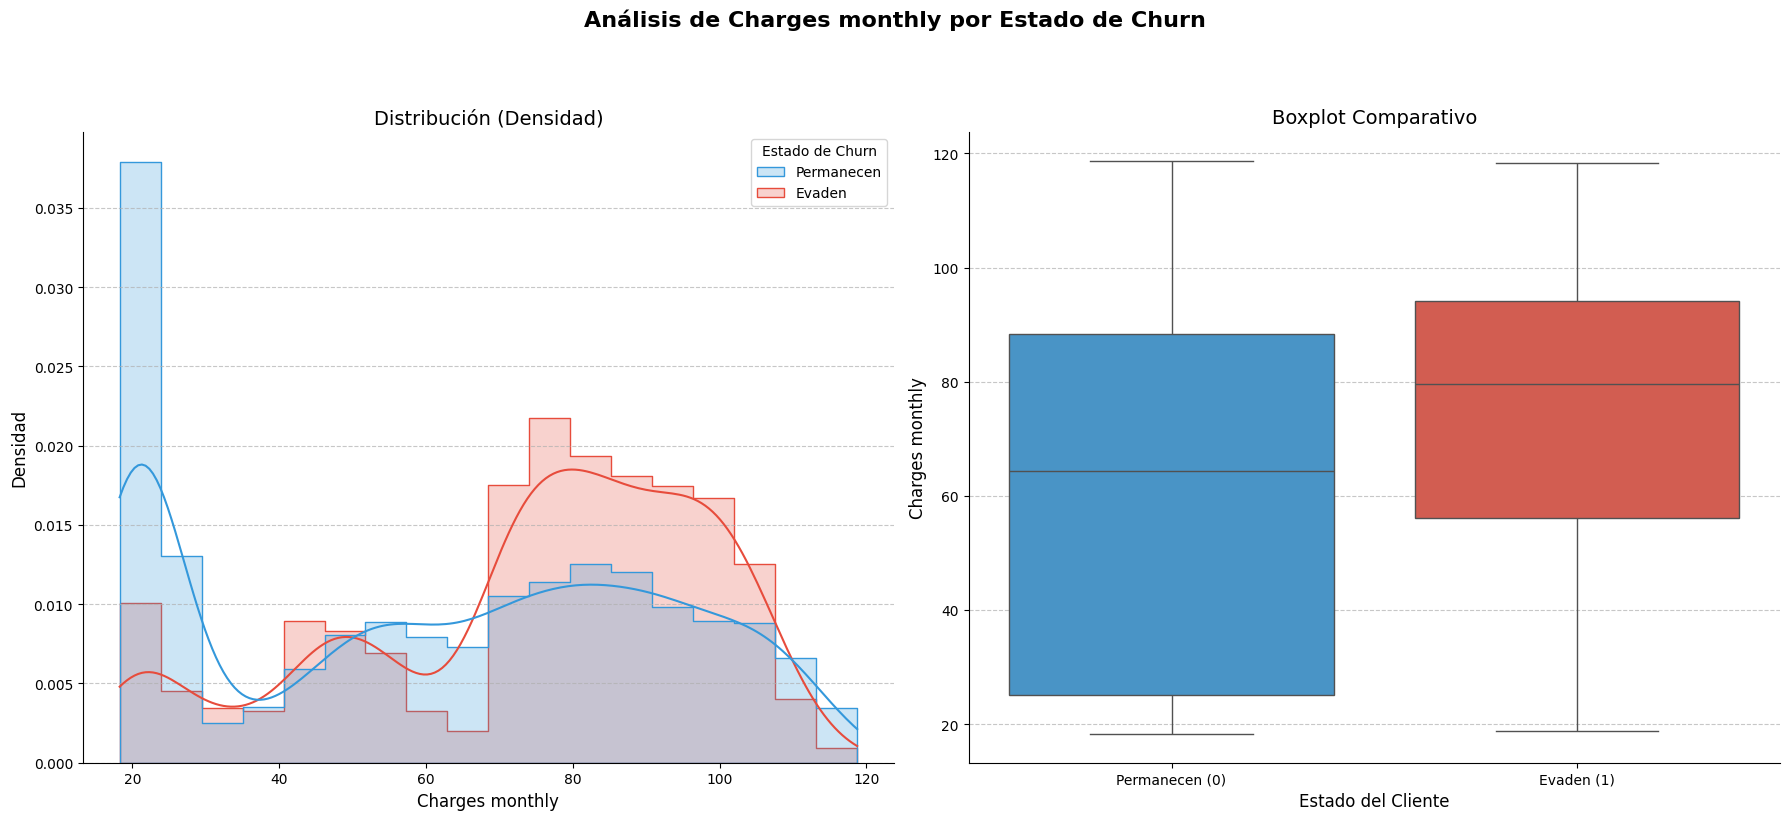


Estad√≠sticas de 'Charges monthly' agrupadas por Churn:


count       mean  median        std    min     max
churn                                                         
Evaden       1869  74.441332  79.650  24.666053  18.85  118.35
Permanecen   5174  61.265124  64.425  31.092648  18.25  118.75

----------------------------------------------------------------------


--- An√°lisis para: Charges total ---


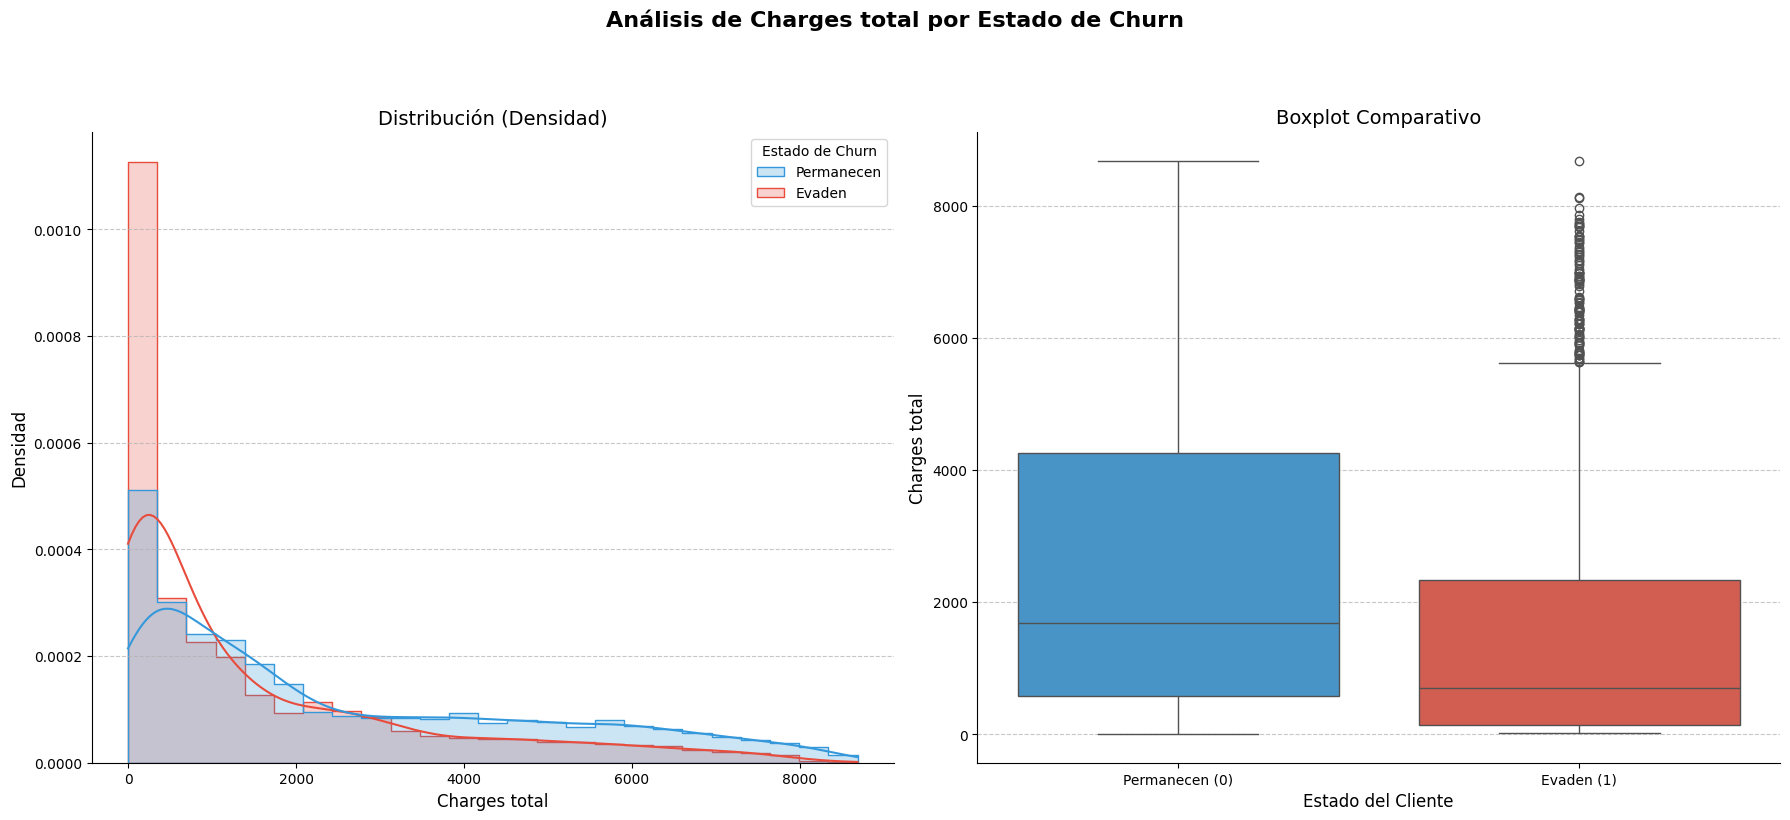


Estad√≠sticas de 'Charges total' agrupadas por Churn:


count         mean    median          std    min      max
churn                                                                
Evaden       1869  1531.796094   703.550  1890.822994  18.85  8684.80
Permanecen   5174  2549.911442  1679.525  2329.954215   0.00  8672.45

----------------------------------------------------------------------


--- An√°lisis para: Daily charges ---


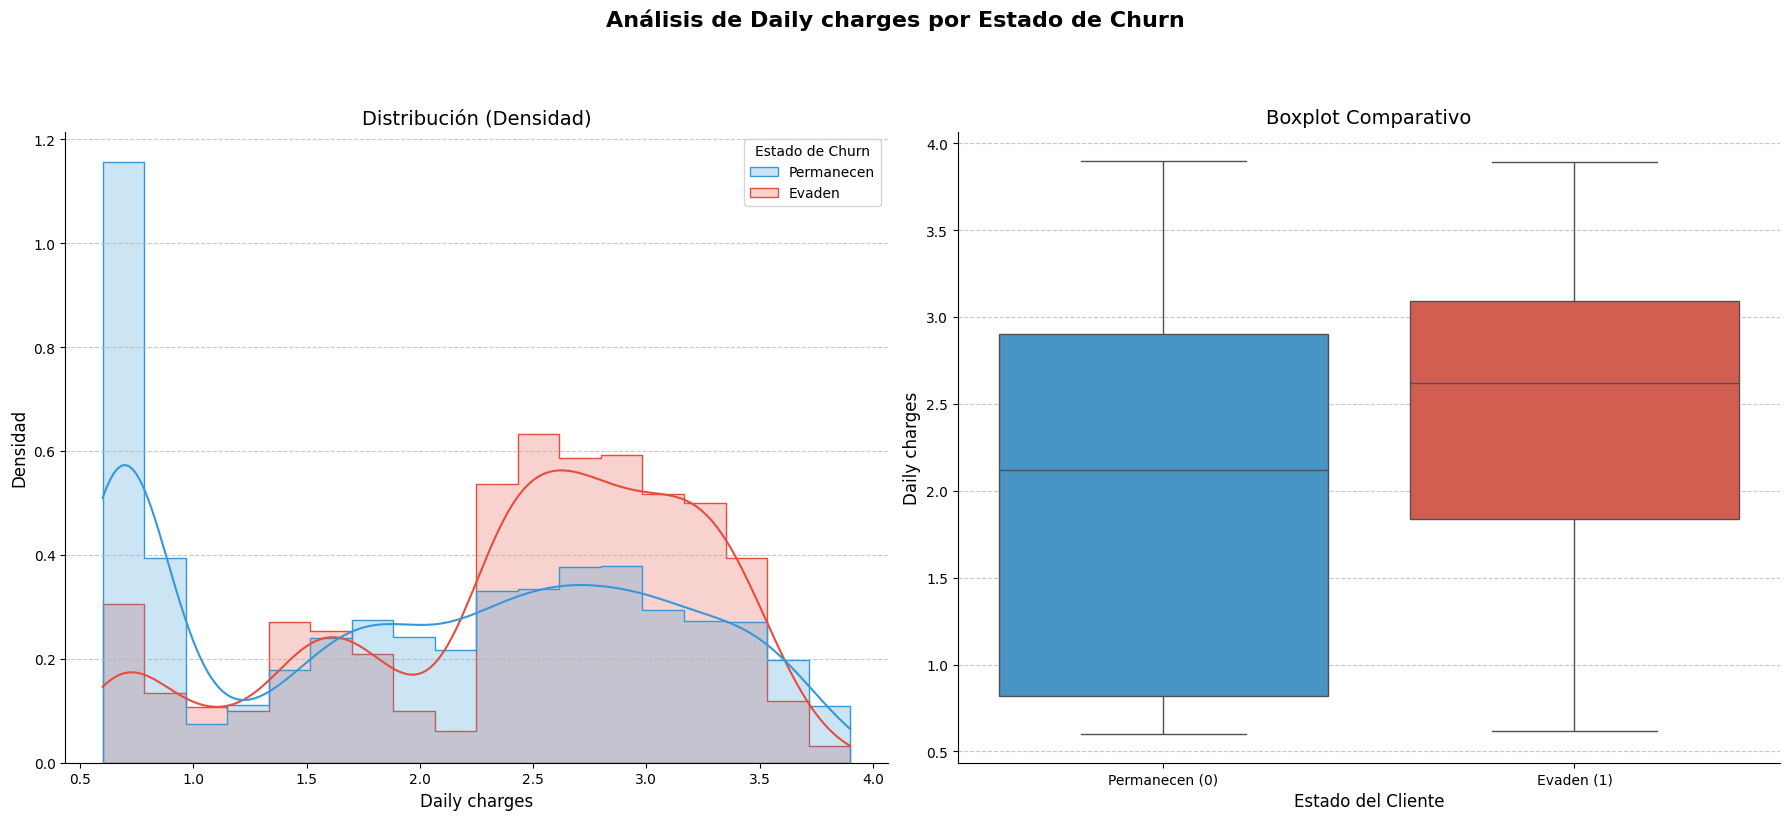


Estad√≠sticas de 'Daily charges' agrupadas por Churn:


count      mean  median       std   min   max
churn                                                    
Evaden       1869  2.445650    2.62  0.810428  0.62  3.89
Permanecen   5174  2.012841    2.12  1.021402  0.60  3.90

----------------------------------------------------------------------


In [21]:
# VISUALIZACI√ìN DE CHURN POR VARIABLES NUM√âRICAS (HISTOGRAMA Y BOXPLOT ALINEADOS)

import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd # Asumiendo que ya est√° importado
# import numpy as np  # Asumiendo que ya est√° importado
# from IPython.display import display # Asumiendo que ya est√° importado

col_churn = 'churn' 

if not df.empty and col_churn in df.columns:
    print(f"--- AN√ÅLISIS DE EVASI√ìN POR VARIABLES NUM√âRICAS (vs. '{col_churn}') ---")

    numerical_features_to_analyze = [
        'tenure', 
        'charges_monthly', 
        'charges_total', 
        'daily_charges'
    ]
    
    churn_legend_map = {0: 'Permanecen', 1: 'Evaden'}
    churn_xtick_map_for_boxplot = {0: 'Permanecen (0)', 1: 'Evaden (1)'}

    for feature in numerical_features_to_analyze:
        if not (feature in df.columns and pd.api.types.is_numeric_dtype(df[feature])):
            if feature not in df.columns:
                print(f"\nAdvertencia: La columna num√©rica '{feature}' no existe en el DataFrame. Omitiendo...")
            else:
                print(f"\nAdvertencia: La columna '{feature}' no es de tipo num√©rico. Tipo actual: {df[feature].dtype}. Omitiendo...")
            print("-" * 70)
            continue 

        feature_label = feature.replace('.', ' ').replace('_', ' ').capitalize()
        print(f"\n\n--- An√°lisis para: {feature_label} ---")

        fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # Tu figsize ajustado
        fig.suptitle(f'An√°lisis de {feature_label} por Estado de Churn', fontsize=16, fontweight='bold', y=1.02)

        # --- SUBPLOT 1: Histograma / KDE ---
        ax_hist = axes[0]
        sns.histplot(data=df, x=feature, hue=df[col_churn].map(churn_legend_map), 
                     kde=True, ax=ax_hist, 
                     palette={'Permanecen': '#3498db', 'Evaden': '#e74c3c'},
                     multiple="layer", 
                     element="step",
                     stat="density", common_norm=False)
        ax_hist.set_title(f'Distribuci√≥n (Densidad)', fontsize=14)
        ax_hist.set_xlabel(feature_label, fontsize=12)
        ax_hist.set_ylabel('Densidad', fontsize=12)
        
        legend_hist = ax_hist.get_legend()
        if legend_hist is not None:
            legend_hist.set_title('Estado de Churn')
        elif df[col_churn].map(churn_legend_map).nunique() > 0 :
                 ax_hist.legend(title='Estado de Churn', labels=list(churn_legend_map.values())) # Asegurar que labels sea una lista

        sns.despine(ax=ax_hist)
        ax_hist.grid(axis='y', linestyle='--', alpha=0.7)

        # --- SUBPLOT 2: Boxplot ---
        ax_box = axes[1]
        x_mapped_for_boxplot = df[col_churn].map(churn_xtick_map_for_boxplot)
        sns.boxplot(data=df, x=x_mapped_for_boxplot, y=feature,
                    hue=x_mapped_for_boxplot, 
                    palette={'Permanecen (0)': '#3498db', 'Evaden (1)': '#e74c3c'},
                    order=['Permanecen (0)', 'Evaden (1)'],
                    ax=ax_box,
                    legend=False)
                                
        ax_box.set_title(f'Boxplot Comparativo', fontsize=14)
        ax_box.set_xlabel('Estado del Cliente', fontsize=12)
        ax_box.set_ylabel(feature_label, fontsize=12)
        sns.despine(ax=ax_box)
        ax_box.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout(rect=[0, 0, 1, 0.96]) 
        plt.show()

        print(f"\nEstad√≠sticas de '{feature_label}' agrupadas por Churn:")
        display(df.groupby(df[col_churn].map(churn_legend_map))[feature].agg(
            ['count', 'mean', 'median', 'std', 'min', 'max']
        ))
        print("-" * 70) 
            
else:
    print(f"DataFrame vac√≠o o la columna '{col_churn}' no disponible para el an√°lisis num√©rico.")

---

## 4. An√°lisis de Correlaci√≥n (Extra)

Como un paso adicional y opcional en nuestro an√°lisis, exploraremos la correlaci√≥n entre diferentes variables del conjunto de datos. Este an√°lisis nos puede ayudar a cuantificar la fuerza y direcci√≥n de las relaciones lineales entre pares de variables, y es particularmente √∫til para identificar qu√© factores podr√≠an tener una relaci√≥n m√°s significativa con la evasi√≥n de clientes (`churn`).

Los insights obtenidos aqu√≠ pueden ser valiosos para la construcci√≥n de modelos predictivos m√°s robustos y para entender mejor la interdependencia de las caracter√≠sticas del cliente. Nos enfocaremos en:

*   La relaci√≥n entre la cuenta diaria (`daily_charges`) y la evasi√≥n (`churn`).
*   C√≥mo la cantidad de servicios contratados (`total_services_count`) afecta la probabilidad de `churn`.

### 4.1. Preparaci√≥n de Datos para el An√°lisis de Correlaci√≥n

Antes de calcular las correlaciones, es necesario preparar los datos. Esto implica:
1.  Asegurar que todas las variables a incluir en el an√°lisis de correlaci√≥n sean de tipo num√©rico.
2.  Crear nuevas caracter√≠sticas (feature engineering) si es necesario, como una variable que represente la cantidad total de servicios contratados por cada cliente.

En esta subsecci√≥n, crearemos la variable `total_services_count`. Para ello, primero calcularemos temporalmente el n√∫mero de servicios binarios activos (`_temp_binary_services_count`) y si el cliente tiene servicio de internet (`_temp_has_internet_service`). Luego, sumaremos estos para obtener `total_services_count` y eliminaremos las columnas temporales.

In [22]:
#  PREPARACI√ìN PARA AN√ÅLISIS DE CORRELACI√ìN

# Recordatorio: 'churn' ya es num√©rico (0 o 1)
# 'daily_charges' ya es num√©rico

# 1. Crear la columna 'total_services_count'
#   Listamos las columnas que representan servicios adicionales que el cliente puede contratar.
#   Nos aseguramos de que los nombres de columna coincidan con los ya limpiados y que sean binarios (0 o 1).
servicios_binarios_cols = [
    'phoneservice',
    'multiplelines',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies'
    # Nota: 'seniorcitizen' y 'gender' son binarias pero no son "servicios contratados" per se,
    # por lo que no se incluyen aqu√≠ para el conteo de servicios.
    # Se incluir√°n directamente en df_corr si se desea analizar su correlaci√≥n.
]

# Verificar que todas las columnas de servicios binarios existen en el DataFrame
existing_servicios_binarios_cols = [col for col in servicios_binarios_cols if col in df.columns]

# Sumar los servicios que ya son binarios (0 o 1)
# Creamos una columna temporal para esta suma.
if existing_servicios_binarios_cols:
    df['_temp_binary_services_count'] = df[existing_servicios_binarios_cols].sum(axis=1)
else:
    df['_temp_binary_services_count'] = 0 # Si no hay columnas de servicios binarios existentes

# Tratar 'internetservice' de forma especial para el conteo
# Creamos una columna temporal para indicar si tiene internet.
if 'internetservice' in df.columns and df['internetservice'].dtype == 'category' or df['internetservice'].dtype == 'object':
    # Asumimos que 'no' en 'internetservice' significa que no tiene el servicio.
    # Los otros valores ('dsl', 'fiber_optic') significan que s√≠ tiene.
    df['_temp_has_internet_service'] = df['internetservice'].apply(lambda x: 0 if str(x).lower() == 'no' else 1)
else:
    # Si 'internetservice' no existe o no es categ√≥rica/objeto como se espera,
    # asumimos que no se puede determinar el servicio de internet de esta forma.
    df['_temp_has_internet_service'] = 0
    if 'internetservice' in df.columns:
        print(f"Advertencia: La columna 'internetservice' no es de tipo category/object como se esperaba (tipo actual: {df['internetservice'].dtype}). No se sumar√° al conteo de servicios.")


# Calcular 'total_services_count'
df['total_services_count'] = df['_temp_binary_services_count'] + df['_temp_has_internet_service']

# Descartar las columnas temporales auxiliares despu√©s de usarlas
columns_to_drop_temp = ['_temp_binary_services_count', '_temp_has_internet_service']
df.drop(columns=[col for col in columns_to_drop_temp if col in df.columns], inplace=True)


print("--- Valores √önicos de 'total_services_count' ---")
if 'total_services_count' in df.columns:
    print(df['total_services_count'].value_counts().sort_index())
else:
    print("'total_services_count' no fue creada o eliminada incorrectamente.")

# 2. Seleccionar las columnas relevantes para la matriz de correlaci√≥n
#    Incluimos 'churn', 'daily_charges', 'total_services_count' y otras num√©ricas/binarias de inter√©s.
cols_for_corr = [
    'churn',
    'daily_charges',
    'total_services_count', # Columna reci√©n creada
    'tenure',
    'charges_monthly',
    'charges_total',
    'seniorcitizen', # Ya es 0 o 1
    'gender'         # Ya es 0 o 1
]

# Filtrar solo las columnas que existen en el df para evitar errores
existing_cols_for_corr = [col for col in cols_for_corr if col in df.columns]

if existing_cols_for_corr:
    df_corr = df[existing_cols_for_corr].copy() # Usar .copy() para evitar SettingWithCopyWarning
    print("\n--- Primeras Filas del DataFrame para Correlaci√≥n (df_corr) ---")
    display(df_corr.head())
else:
    print("\nNo se encontraron columnas suficientes para el an√°lisis de correlaci√≥n.")
    df_corr = pd.DataFrame() # Crear DataFrame vac√≠o para evitar errores en celdas siguientes

--- Valores √önicos de 'total_services_count' ---
total_services_count
1    1264
2     859
3     846
4     965
5     922
6     908
7     676
8     395
9     208
Name: count, dtype: int64

--- Primeras Filas del DataFrame para Correlaci√≥n (df_corr) ---


churn  daily_charges  total_services_count  tenure  charges_monthly  \
0      0           2.16                     5       9             65.6   
1      0           1.97                     4       9             59.9   
2      1           2.43                     3       4             73.9   
3      1           3.22                     6      13             98.0   
4      1           2.76                     4       3             83.9   

   charges_total  seniorcitizen  gender  
0         593.30              0       0  
1         542.40              0       1  
2         280.85              0       1  
3        1237.85              1       1  
4         267.40              1       0


**Explicaci√≥n del Paso 1 (Preparaci√≥n de Datos):**
*   Se listan las columnas que representan servicios que ya han sido convertidos a un formato binario (0 o 1).
*   Se crea una columna temporal `_temp_binary_services_count` sumando estos servicios binarios.
*   Se trata la columna `internetservice` (que es categ√≥rica) para crear otra columna temporal, `_temp_has_internet_service`, que es 1 si el cliente tiene cualquier tipo de servicio de internet ('dsl' o 'fiber_optic') y 0 si no tiene ('no').
*   La columna final `total_services_count` se calcula sumando `_temp_binary_services_count` y `_temp_has_internet_service`.
*   Importante: Las columnas temporales `_temp_binary_services_count` y `_temp_has_internet_service` se eliminan del DataFrame principal `df` despu√©s de ser utilizadas, para mantener el conjunto de datos limpio.
*   Finalmente, se selecciona un subconjunto de columnas num√©ricas y binarias relevantes (incluyendo la reci√©n creada `total_services_count`) en un nuevo DataFrame llamado `df_corr`, que se utilizar√° para calcular la matriz de correlaci√≥n.

---
### 4.2. Matriz de Correlaci√≥n
Con los datos preparados en `df_corr`, ahora calcularemos la matriz de correlaci√≥n. Visualizaremos esta matriz usando un heatmap de Seaborn, una herramienta gr√°fica efectiva para identificar r√°pidamente patrones y la intensidad de las relaciones lineales entre las variables seleccionadas.

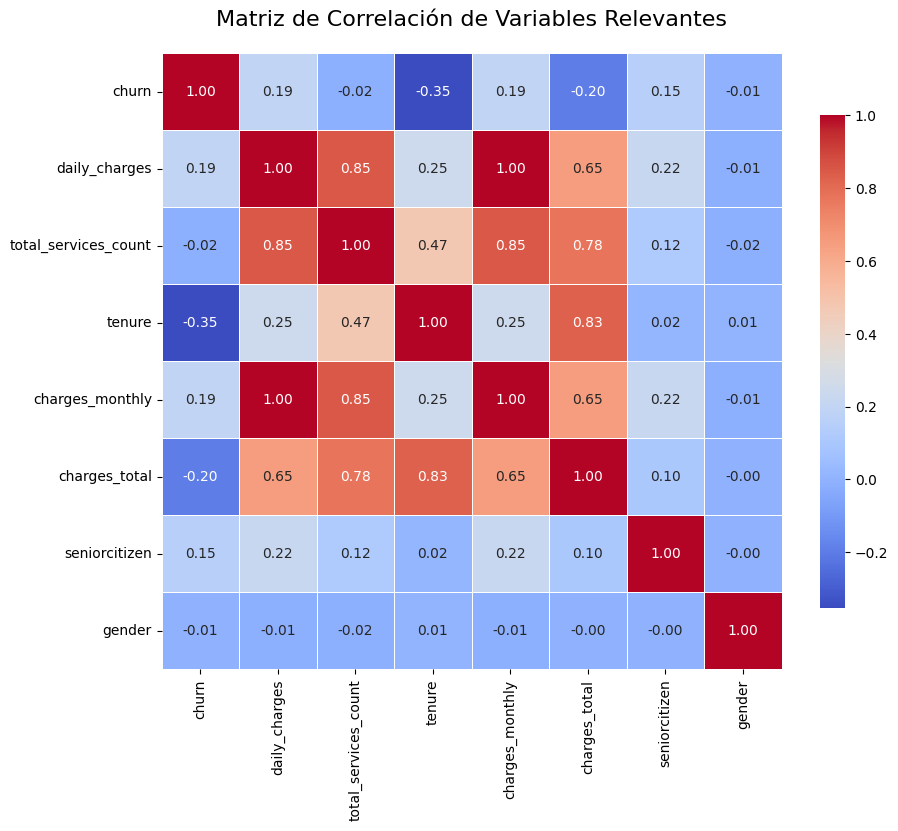


--- Correlaci√≥n Espec√≠fica con 'churn' ---
churn                   1.000000
charges_monthly         0.193356
daily_charges           0.193336
seniorcitizen           0.150889
gender                 -0.008612
total_services_count   -0.019375
charges_total          -0.198324
tenure                 -0.352229
Name: churn, dtype: float64


In [23]:
# MATRIZ DE CORRELACI√ìN

if not df_corr.empty:
    # Calcular la matriz de correlaci√≥n
    correlation_matrix = df_corr.corr()

    # Visualizar la matriz de correlaci√≥n usando un heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                annot=True,          # Mostrar los valores de correlaci√≥n en las celdas
                cmap='coolwarm',     # Paleta de colores (azul para negativo, rojo para positivo)
                fmt=".2f",           # Formato de los n√∫meros (2 decimales)
                linewidths=.5,       # L√≠neas entre celdas
                cbar_kws={"shrink": .8} # Ajustar el tama√±o de la barra de color
               )
    plt.title('Matriz de Correlaci√≥n de Variables Relevantes', fontsize=16, pad=20)
    plt.show()

    if 'churn' in correlation_matrix:
        print("\n--- Correlaci√≥n Espec√≠fica con 'churn' ---")
        # Mostrar solo la correlaci√≥n de todas las variables con 'churn', ordenadas
        churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)
        print(churn_correlation)
    else:
        print("La columna 'churn' no est√° en el DataFrame de correlaci√≥n.")
else:
    print("El DataFrame para correlaci√≥n (df_corr) est√° vac√≠o. No se puede generar la matriz.")


**Interpretaci√≥n de la Matriz de Correlaci√≥n y Correlaci√≥n con `churn`:**
*   **Valores Cercanos a +1:** Indican una fuerte correlaci√≥n positiva (a medida que una variable aumenta, la otra tiende a aumentar).
*   **Valores Cercanos a -1:** Indican una fuerte correlaci√≥n negativa (a medida que una variable aumenta, la otra tiende a disminuir).
*   **Valores Cercanos a 0:** Indican una correlaci√≥n d√©bil o nula.

Prestaremos especial atenci√≥n a la fila (o columna) correspondiente a `churn` en el heatmap y en la serie de correlaciones impresas. Esto nos ayudar√° a entender:
*   La relaci√≥n entre `daily_charges` y `churn`: ¬øExiste una tendencia de que clientes con cargos diarios m√°s altos (o m√°s bajos) evadan m√°s?
*   La relaci√≥n entre `total_services_count` y `churn`: ¬øTener un mayor (o menor) n√∫mero total de servicios contratados se asocia con una mayor o menor probabilidad de evasi√≥n?
*   La relaci√≥n entre `tenure` y `churn`: Com√∫nmente, se espera que los clientes con mayor antig√ºedad (tenure) tengan menor probabilidad de evadir.
*   La relaci√≥n entre `charges_monthly` y `churn`: ¬øC√≥mo influyen los cargos mensuales en la decisi√≥n de los clientes de permanecer o irse?

---
### 4.3. Visualizaci√≥n Espec√≠fica de Relaciones con `churn`

Aunque la matriz de correlaci√≥n ofrece una visi√≥n general, para nuestras preguntas espec√≠ficas, ciertos gr√°ficos pueden ser m√°s directos y elocuentes.

#### a) Relaci√≥n entre `daily_charges` y `churn`
La relaci√≥n entre una variable num√©rica (`daily_charges`) y una variable binaria (`churn`) se visualiz√≥ efectivamente mediante boxplots en la secci√≥n `3.2.3. Distribuci√≥n de Evasi√≥n (Churn) por Variables Num√©ricas`. La matriz de correlaci√≥n calculada en el paso `4.2` nos proporciona una medida num√©rica de la fuerza y direcci√≥n de esta relaci√≥n lineal.

#### b) Impacto de la `total_services_count` en la probabilidad de `churn`
Para entender c√≥mo la cantidad total de servicios contratados influye en la evasi√≥n, agruparemos los clientes por su `total_services_count` y calcularemos la tasa de churn promedio para cada grupo. Esto se visualizar√° mediante un gr√°fico de barras, lo que facilitar√° la identificaci√≥n de cualquier tendencia o patr√≥n.

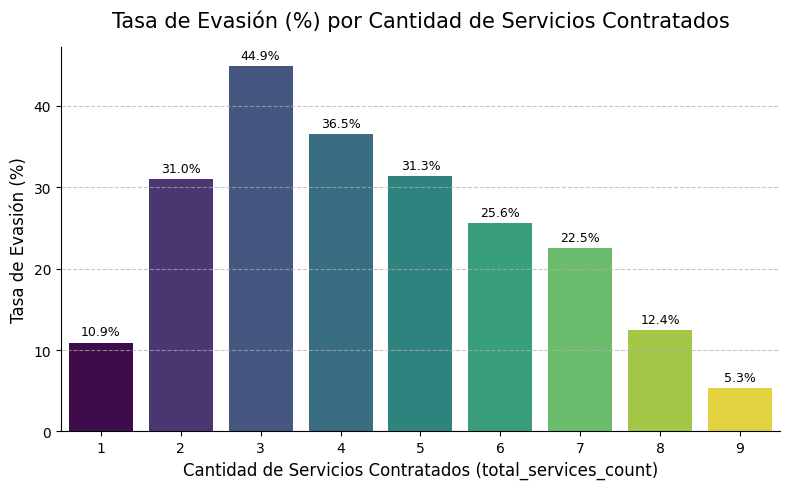


--- Tasa de Evasi√≥n por Cantidad de Servicios Contratados ---
total_services_count
1    10.917722
2    30.966240
3    44.917258
4    36.476684
5    31.344902
6    25.550661
7    22.485207
8    12.405063
9     5.288462
Name: churn, dtype: float64


In [24]:
# AN√ÅLISIS DE CHURN POR CANTIDAD DE SERVICIOS

if 'total_services_count' in df.columns and 'churn' in df.columns:
    # Calcular la tasa de churn promedio por cantidad de servicios
    churn_rate_by_services = df.groupby('total_services_count')['churn'].mean() * 100 # En porcentaje
    churn_rate_by_services = churn_rate_by_services.sort_index()

    if not churn_rate_by_services.empty:
        plt.figure(figsize=(8, 5)) # Ajustado para mejor visualizaci√≥n si hay muchas categor√≠as
        ax = sns.barplot(x=churn_rate_by_services.index,
                         y=churn_rate_by_services.values,
                         hue=churn_rate_by_services.index,  # <--- ACTUALIZADO
                         palette="viridis",                 # Probar otras paletas
                         legend=False)                      # <--- ACTUALIZADO

        plt.title('Tasa de Evasi√≥n (%) por Cantidad de Servicios Contratados', fontsize=15, pad=15)
        plt.xlabel('Cantidad de Servicios Contratados (total_services_count)', fontsize=12)
        plt.ylabel('Tasa de Evasi√≥n (%)', fontsize=12)
        # plt.xticks(rotation=45, ha='right') # Descomentar si hay muchas categor√≠as de conteo de servicios
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # A√±adir anotaciones de porcentaje en las barras
        for i, v_bar in enumerate(ax.patches): # Iterar sobre los patches (barras)
            # Obtener la altura de la barra (valor y)
            height = v_bar.get_height()
            # Escribir el texto en la barra
            ax.text(v_bar.get_x() + v_bar.get_width()/2., # Posici√≥n x (centro de la barra)
                    height + 0.5,                       # Posici√≥n y (un poco encima de la barra)
                    f"{height:.1f}%",                   # Texto a mostrar
                    color='black',
                    ha='center',
                    va='bottom',
                    fontsize=9)

        sns.despine()
        plt.tight_layout()
        plt.show()

        print("\n--- Tasa de Evasi√≥n por Cantidad de Servicios Contratados ---")
        print(churn_rate_by_services)
    else:
        print("No se pudieron calcular las tasas de churn por cantidad de servicios (churn_rate_by_services est√° vac√≠o).")
else:
    print("Las columnas 'total_services_count' o 'churn' no est√°n disponibles para este an√°lisis.")

**Interpretaci√≥n del Gr√°fico de Tasa de Evasi√≥n por `total_services_count`:**
Este gr√°fico nos mostrar√° si existe un patr√≥n discernible entre el n√∫mero total de servicios que un cliente ha contratado y su propensi√≥n a evadir. Por ejemplo, podr√≠amos observar si la tasa de evasi√≥n disminuye consistentemente a medida que aumenta el n√∫mero de servicios, o si existe alg√∫n umbral a partir del cual la evasi√≥n se incrementa o disminuye notablemente.

---
_Fin de la secci√≥n de An√°lisis de Correlaci√≥n._


---

### **5. Informe Final: An√°lisis de Evasi√≥n de Clientes en TelecomX LATAM**

üìÖ **Fecha:** 10 de junio de 2025

---

#### **5.1. Introducci√≥n**

Este informe presenta los resultados del an√°lisis exploratorio aplicado al conjunto de datos de clientes de **TelecomX LATAM**, con el objetivo de comprender los factores que impulsan la **evasi√≥n de clientes (churn)**.

Dada la alta tasa de cancelaciones, este fen√≥meno representa una amenaza directa a los ingresos recurrentes y a la sostenibilidad del negocio. Para abordar esta problem√°tica, se ejecutaron las fases de **extracci√≥n, limpieza, transformaci√≥n y an√°lisis visual** de los datos.

El objetivo central fue identificar patrones que diferencien a los clientes que abandonan el servicio de aquellos que permanecen. Estos hallazgos constituyen la base para recomendaciones estrat√©gicas orientadas a mejorar la retenci√≥n y satisfacci√≥n del cliente.

---

#### **5.2. Limpieza y Preparaci√≥n de los Datos**

Se trabaj√≥ con un dataset inicial de **7,267 registros** y **21 columnas**. Las acciones principales de procesamiento fueron:

##### **5.2.1. Extracci√≥n y Carga del Dataset**
- Los datos fueron obtenidos en formato JSON desde la URL:
  `https://storage.googleapis.com/desafio-telecomx-churn-analysis/Dataset/TelecomX_Data.json`
- Se implement√≥ manejo de errores y validaci√≥n de formato JSON.
- Los datos fueron normalizados con `pandas.json_normalize()`.

##### **5.2.2. Inspecci√≥n General**
- Se usaron m√©todos como `df.info()`, `df.describe()` y `df.shape` para revisar la estructura, tipos de datos y valores nulos.

##### **5.2.3. Tratamiento de Valores Nulos y Duplicados**
- La columna `charges_total` (originalmente `account.charges_total`) conten√≠a strings vac√≠os que fueron tratados como `NaN`, convertidos a `float` e imputados con `0`.
- Se eliminaron filas donde la columna `churn` estaba vac√≠a, reduciendo el dataset a **7,043 registros v√°lidos**.
- Se verific√≥ y elimin√≥ cualquier fila duplicada.

##### **5.2.4. Estandarizaci√≥n y Limpieza de Variables**
- **Nombres de Columnas:** Se eliminaron prefijos (`customer.`, `account.`, etc.), se convirtieron a min√∫sculas y se reemplazaron los puntos por guiones bajos.
- **Contenido Textual:** El contenido de las columnas `object` fue convertido a min√∫sculas y se eliminaron espacios en blanco.
- **Valores Espec√≠ficos:** Valores como "no internet service" fueron estandarizados a "no".
- **Formato de Valores Categ√≥ricos:** En `paymentmethod`, `contract` e `internetservice`, los espacios se reemplazaron por guiones bajos y se eliminaron los par√©ntesis para mejorar la legibilidad.

##### **5.2.5. Conversi√≥n de Tipos**
- Variables binarias ('yes'/'no') fueron convertidas a `int` (yes: 1, no: 0).
- La columna `gender` fue convertida a `int` (female: 0, male: 1).
- Columnas categ√≥ricas clave (`internetservice`, `contract`) fueron convertidas al tipo `category` para optimizar el uso de memoria.

##### **5.2.6. Feature Engineering**
- Se cre√≥ la columna `daily_charges` para analizar los cargos diarios.
- Se cre√≥ la columna `total_services_count` para cuantificar el n√∫mero de servicios contratados por cliente.

‚úÖ **Resultado**: DataFrame final con **7,043 filas** y **22 columnas procesadas**, listo para el an√°lisis.

---

#### **5.3. An√°lisis Exploratorio de Datos (EDA)**

##### **5.3.1. Estad√≠sticas Generales**
- La **antig√ºedad promedio (`tenure`)** de los clientes es de **32.4 meses** (mediana: 29 meses).
- Los **cargos mensuales (`charges_monthly`)** tienen una media de **&#36;64.76**.
- El **55%** de los clientes (3,875) tienen un contrato de tipo `month-to-month`.

##### **5.3.2. Distribuci√≥n de Churn**
El an√°lisis de la variable objetivo `churn` muestra una tasa de evasi√≥n general del **26.5%**.

- **73.5%** de los clientes permanecen activos (Churn = 0).
- **26.5%** de los clientes han cancelado el servicio (Churn = 1).

<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/distribucion_churn.png" alt="Distribuci√≥n de Evasi√≥n de Clientes (Churn)" width="600" />
</div>

```
El gr√°fico ilustra que aproximadamente una cuarta parte de la base de clientes ha cancelado su servicio, validando la importancia de este an√°lisis.
```

---

##### **5.3.3. Evasi√≥n por Variables Categ√≥ricas**
Las tasas de evasi√≥n (porcentaje de clientes que cancelan dentro de cada categor√≠a) revelaron los siguientes factores de riesgo:

| Variable | Categor√≠a | % Churn |
| :--- | :--- | :--- |
| `paymentmethod` | `electronic_check` | **45.3%** |
| `contract` | `month-to-month` | **42.7%** |
| `internetservice`| `fiber_optic` | **41.9%** |
| `onlinesecurity` | `no` | **31.3%** |

**An√°lisis de Churn por Tipo de Contrato (`contract`)**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/tasas_proporciones_churn_por_contract.png" alt="Tasas y Proporciones de Churn por Contract" width="800" />
</div>

```
Los clientes con contrato `month-to-month` muestran la tasa de evasi√≥n m√°s alta (42.7%). En contraste, aquellos con contratos a `two_year` son significativamente m√°s leales (tasa de evasi√≥n del 2.8%).
```

**An√°lisis de Churn por Servicio de Internet (`internetservice`)**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/tasas_proporciones_churn_por_internetservice.png" alt="Tasas y Proporciones de Churn por Internet Service" width="800" />
</div>

```
El servicio `fiber_optic` se asocia con la tasa de evasi√≥n m√°s elevada (41.9%). Los clientes sin internet son los m√°s leales (7.4%).
```

---

##### **5.3.4. Evasi√≥n por Variables Num√©ricas**
El an√°lisis de medianas revela diferencias importantes en el perfil de los clientes que evaden versus los que permanecen.

| Variable | Evaden (Mediana) | Permanecen (Mediana) |
| :--- | :--- | :--- |
| `tenure` | 10 meses | 38 meses |
| `charges_monthly`| &#36;79.65 | &#36;64.43 |
| `charges_total` | **&#36;703.55** | **&#36;1,679.53** |
| `daily_charges` | &#36;2.62 | &#36;2.12 |

**An√°lisis de Churn por Antig√ºedad (`tenure`)**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/numeric_analysis_churn_por_tenure.png" alt="An√°lisis de Tenure por Estado de Churn" width="800"/>
</div>

```
Los clientes con menor antig√ºedad tienden a evadir m√°s. La distribuci√≥n para quienes evaden est√° concentrada en los primeros meses.
```

**An√°lisis de Churn por Cargos Totales (`charges_total`)**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/numeric_analysis_churn_por_charges_total.png" alt="An√°lisis de Cargos Totales por Estado de Churn" width="800" />
</div>

```
los clientes que abandonaron el servicio acumularon cargos totales significativamente menores (mediana de $703.55) que los clientes que permanecieron (mediana de $1,679.53). Esta diferencia se alinea con el menor tiempo de permanencia de los clientes que se dieron de baja.
```

---

##### **5.3.5. Correlaci√≥n y Tendencias Adicionales**

| Variable | Correlaci√≥n con `churn` |
| :--- | :--- |
| `tenure` | **-0.35** (Fuerte negativa) |
| `charges_monthly`| **+0.19** (D√©bil positiva) |
| `total_services_count` | **-0.02** (Casi nula) |

**Matriz de Correlaci√≥n de Variables Relevantes**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/matriz_correlacion_heatmap.png" alt="Matriz de Correlaci√≥n" width="700" />
</div>

```
El heatmap muestra que la antig√ºedad (`tenure`) tiene la correlaci√≥n negativa m√°s notable con `churn`. Los cargos mensuales (`charges_monthly`) tienen una correlaci√≥n positiva d√©bil. La cantidad total de servicios (`total_services_count`) no muestra una correlaci√≥n lineal fuerte con la evasi√≥n.
```

üìä **Tendencia de Evasi√≥n por Cantidad de Servicios Contratados**
El an√°lisis revela un patr√≥n no lineal: la evasi√≥n es baja con 1 servicio (10.9%), alcanza un pico con **3 servicios (44.9%)**, y luego disminuye considerablemente a partir de 6 servicios.

<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/tasa_churn_por_cantidad_servicios.png" alt="Tasa de Churn por Cantidad de Servicios" width="700" />
</div>

```
Este gr√°fico ilustra una compleja relaci√≥n entre la cantidad de servicios y la lealtad, sugiriendo que ni muy pocos ni un n√∫mero intermedio de servicios son √≥ptimos para la retenci√≥n.
```

---

#### **5.4. Conclusiones Principales**

1.  **Tipo de Contrato (`contract`):** Es el predictor individual m√°s fuerte. Los contratos `month-to-month` son el principal impulsor de la evasi√≥n (42.7%).
2.  **Antig√ºedad (`tenure`):** Factor crucial. Clientes con menos de 12 meses de antig√ºedad presentan un riesgo de evasi√≥n significativamente mayor.
3.  **Servicio de Internet (`internetservice`):** Los clientes con `fiber_optic` tienen una alta tasa de evasi√≥n (41.9%), posiblemente por problemas de servicio, precio o expectativas no cumplidas.
4.  **Servicios de Valor A√±adido:** La ausencia de `onlinesecurity`, `techsupport` y `onlinebackup` se asocia consistentemente con mayores tasas de evasi√≥n.
5.  **M√©todo de Pago (`paymentmethod`):** El uso de `electronic_check` est√° fuertemente correlacionado con una mayor tasa de evasi√≥n (45.3%).
6.  **Cantidad de Servicios (`total_services_count`):** La relaci√≥n con el churn no es lineal. El punto cr√≠tico parece estar entre 2 y 5 servicios, donde la evasi√≥n es m√°s alta.
7.  **Cargos Mensuales (`charges_monthly`):** Aunque quienes evaden pagan un poco m√°s, la relaci√≥n es m√°s d√©bil en comparaci√≥n con otros factores.

---

#### **5.5. Recomendaciones Estrat√©gicas**

1.  **Fomentar Contratos a Largo Plazo:**
    *   **Acci√≥n:** Implementar campa√±as para migrar a clientes de contratos `month-to-month` (especialmente aquellos con `fiber_optic` o que pagan con `electronic_check`) a planes anuales o bianuales.
    *   **Incentivos:** Ofrecer descuentos significativos, upgrades de servicio o beneficios exclusivos por permanencia.

2.  **Fortalecer el Onboarding y la Retenci√≥n Temprana:**
    *   **Acci√≥n:** Desarrollar un programa de onboarding robusto para los primeros 3-6 meses, enfocado en asegurar la satisfacci√≥n y el uso de los servicios.
    *   **Justificaci√≥n:** Mitigar la alta tasa de churn en clientes con baja antig√ºedad (`tenure`).

3.  **Auditar y Optimizar la Experiencia del Servicio `fiber_optic`:**
    *   **Acci√≥n:** Realizar an√°lisis de causa ra√≠z para los clientes de `fiber_optic` que han evadido. Evaluar precios, calidad del servicio y efectividad del soporte t√©cnico.
    *   **Justificaci√≥n:** Abordar la alta tasa de evasi√≥n en lo que deber√≠a ser un servicio premium.

4.  **Promocionar Activamente Servicios de Valor A√±adido:**
    *   **Acci√≥n:** Crear paquetes que incluyan `onlinesecurity`, `techsupport` y `onlinebackup` a precios atractivos. Educar a los clientes sobre sus beneficios.
    *   **Justificaci√≥n:** Estos servicios demostraron ser factores clave de retenci√≥n.

5.  **Mejorar y Diversificar los M√©todos de Pago:**
    *   **Acci√≥n:** Investigar fricciones en el pago con `electronic_check` e incentivar la adopci√≥n de m√©todos autom√°ticos (d√©bito directo, tarjeta de cr√©dito).
    *   **Justificaci√≥n:** Reducir el riesgo asociado al m√©todo de pago m√°s problem√°tico.

6.  **Revisar y Optimizar el Portfolio de Paquetes de Servicios:**
    *   **Acci√≥n:** Analizar la estructura de precios y beneficios de los paquetes que incluyen entre 2 y 5 servicios. Considerar la creaci√≥n de "mini-bundles" de alto valor.
    *   **Justificaci√≥n:** Abordar la alta tasa de churn en el segmento de 2-5 servicios.

7.  **Implementar Modelos Predictivos de Churn:**
    *   **Acci√≥n:** Utilizar los factores identificados (especialmente `contract`, `tenure`, `internetservice`, `onlinesecurity`) como variables clave para desarrollar modelos de machine learning.
    *   **Justificaci√≥n:** Permitir√≠a a TelecomX LATAM realizar intervenciones proactivas para retener a los clientes en riesgo antes de que cancelen el servicio.

---

*Informe elaborado por:*
**Nelson Enrique Reyes Fabi√°n**
Desaf√≠o Alura LATAM ‚Äî TelecomX